In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
import datetime
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
import statistics

In [2]:
df = pd.read_excel(r'C:\Users\u22v09\Desktop\Data_7_14.xlsx')
df = df.rename(columns = {'Unnamed: 0':'time'}).set_index('time')
df.index.freq = 'H'

In [3]:
df[df['EM4'] < 0] = 0

In [4]:
df.tail()

,EM4
time,
2020-07-14 07:00:00,153.0
2020-07-14 08:00:00,187.0
2020-07-14 09:00:00,221.0
2020-07-14 10:00:00,332.0
2020-07-14 11:00:00,80.0


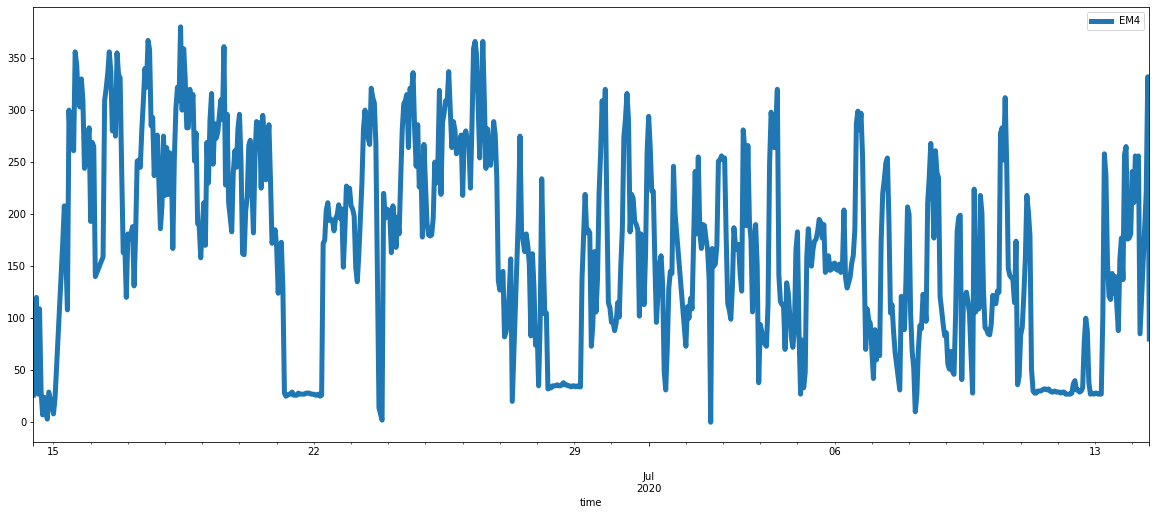

In [5]:
df.plot(figsize = (20,8), lw = 5)

In [6]:
result = seasonal_decompose(df['EM4'], model='additive')
# result.plot()
# plt.show()

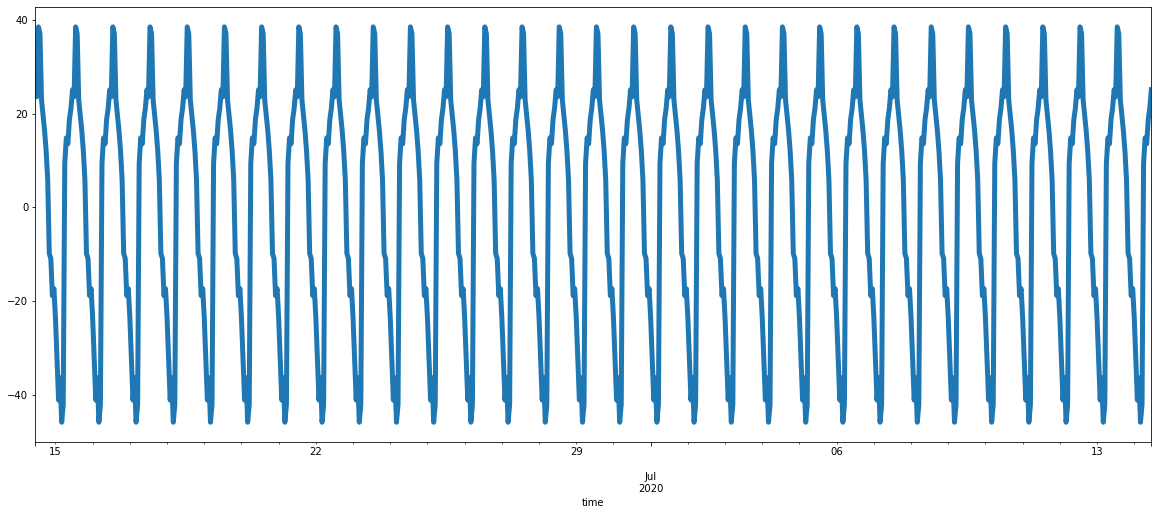

In [7]:
result.seasonal.plot(figsize = (20,8), lw = 5)

In [8]:
EM4 = df.copy()

In [9]:
from statsmodels.tsa.stattools import adfuller
result_l = adfuller(EM4['EM4'])
print('ADF Statistic: %f' % result_l[0])
print('p-value: %.12f' % result_l[1])
print('Critical Values:')
for key, value in result_l[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.695342
p-value: 0.004179153621
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [10]:
len(EM4)

721

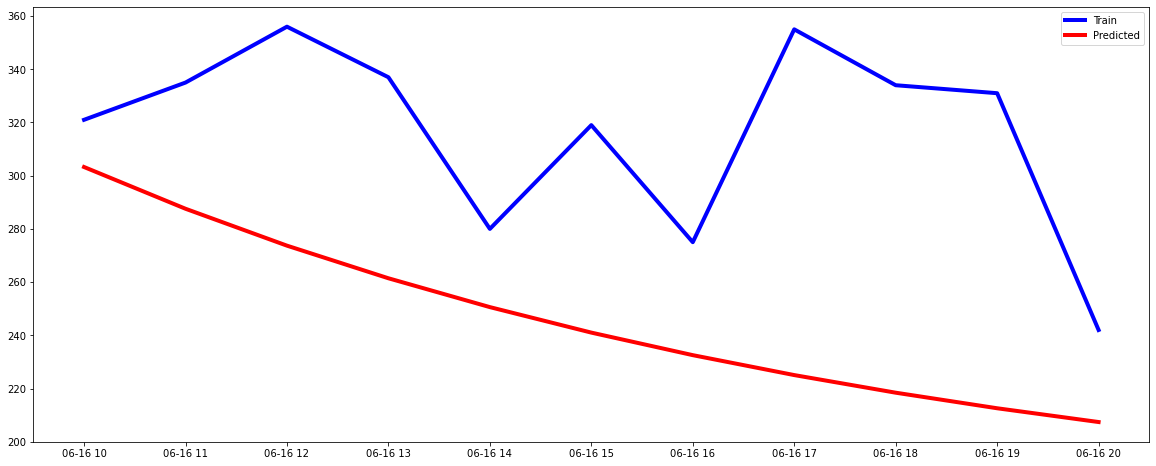

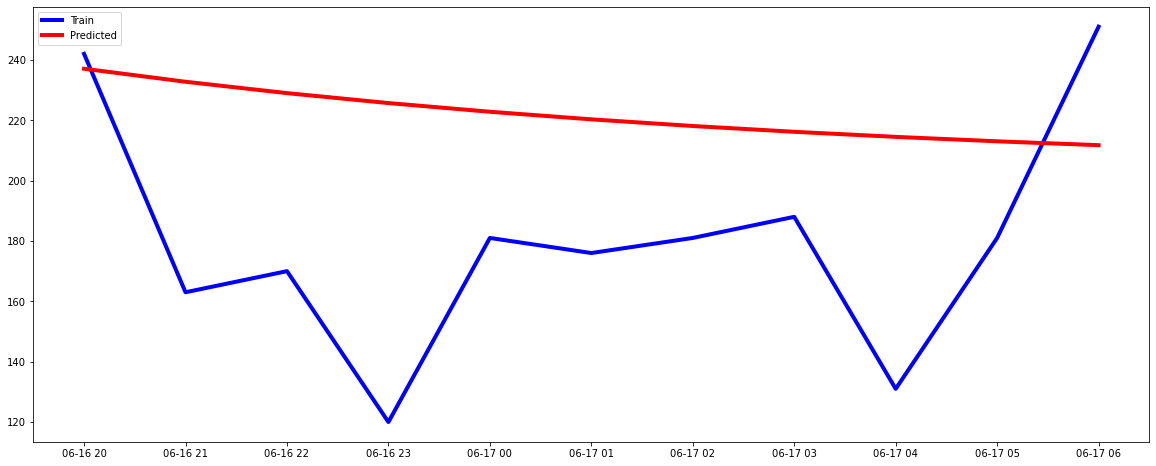

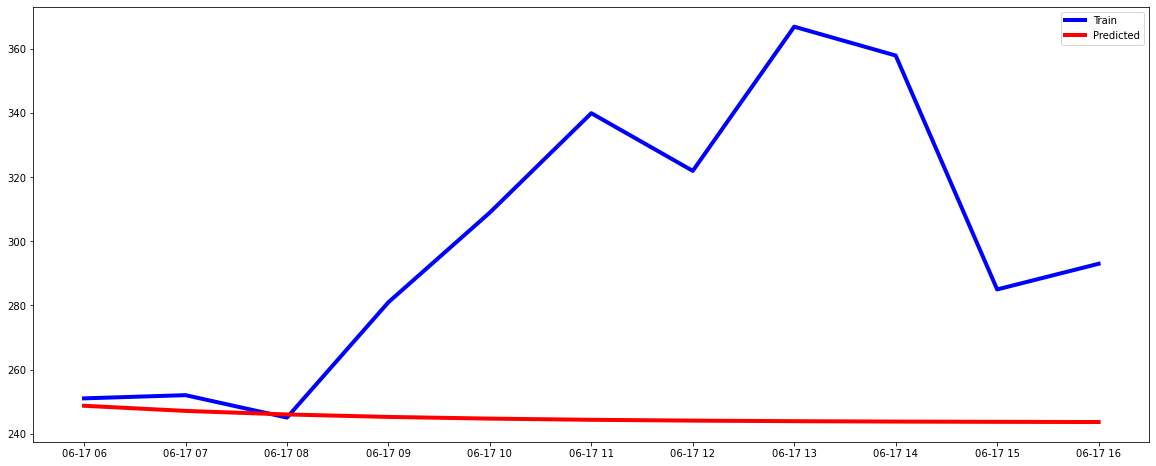

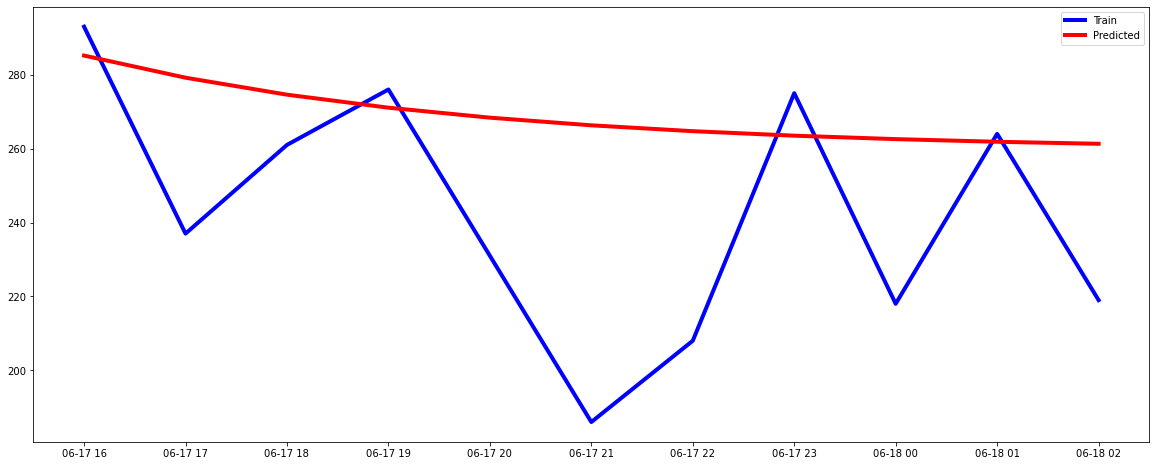

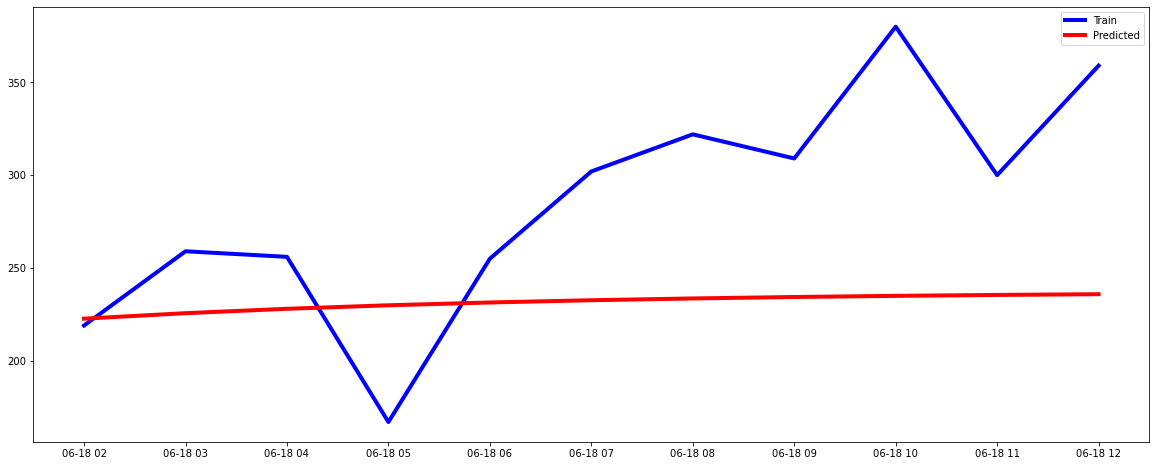

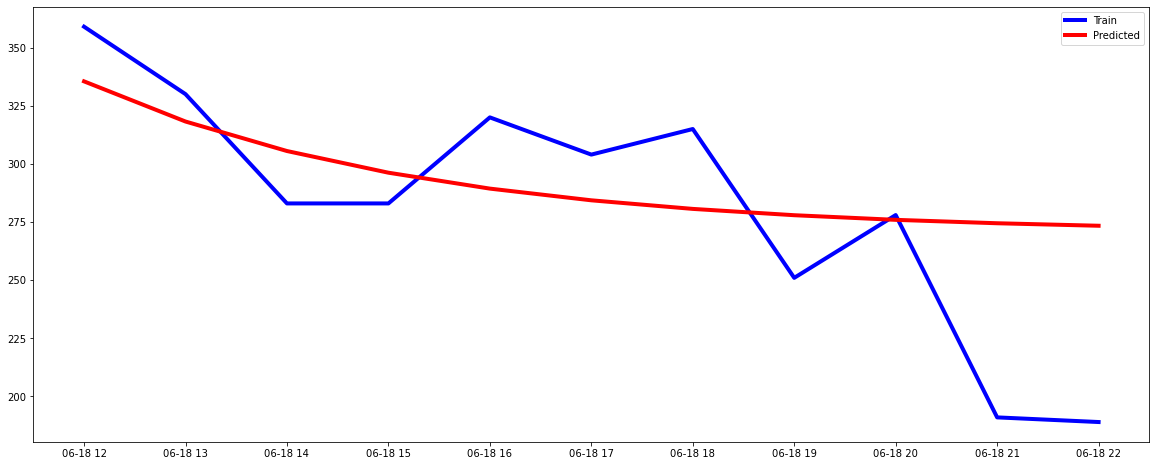

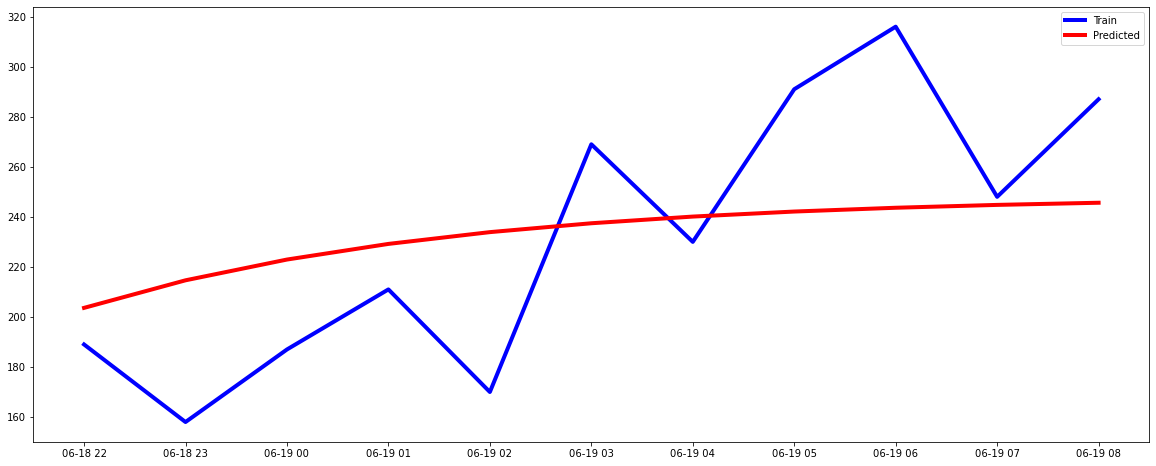

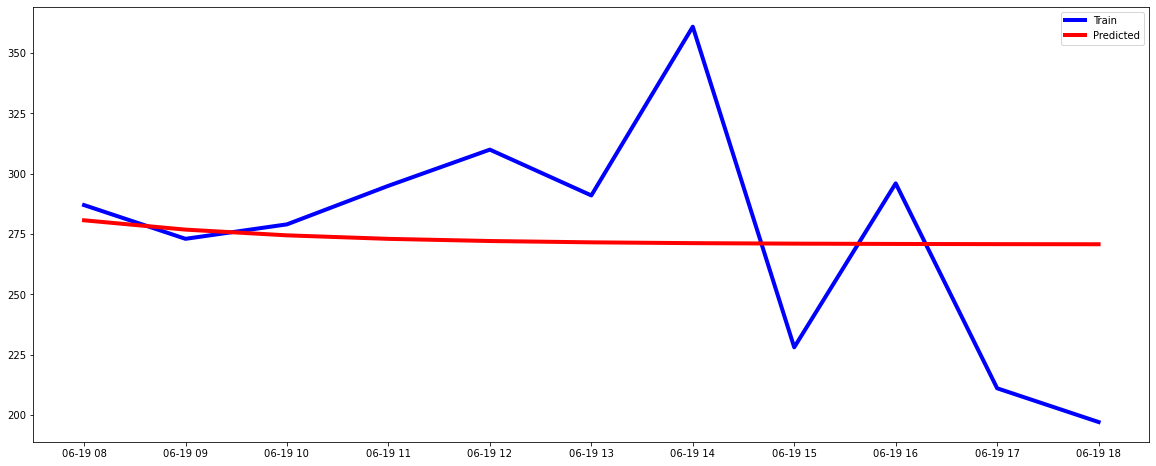

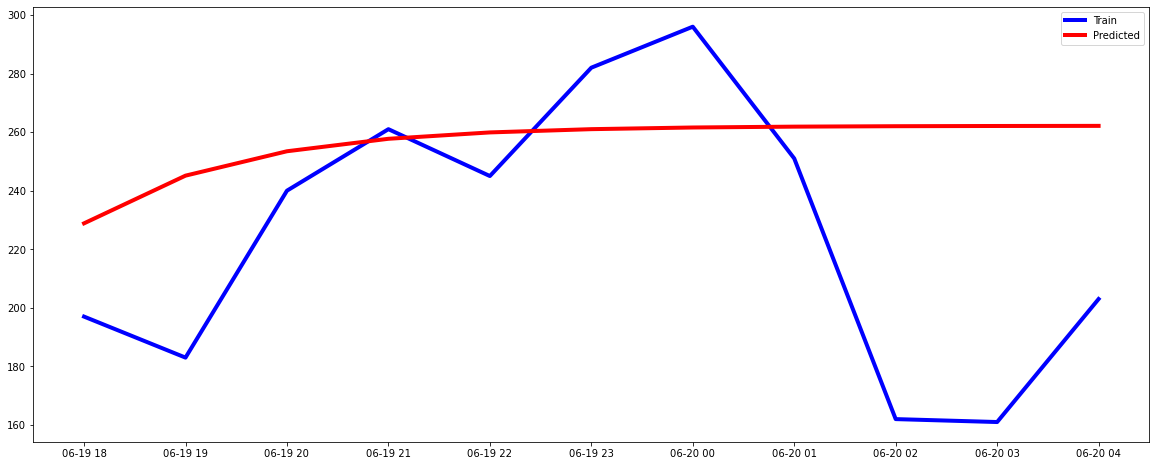

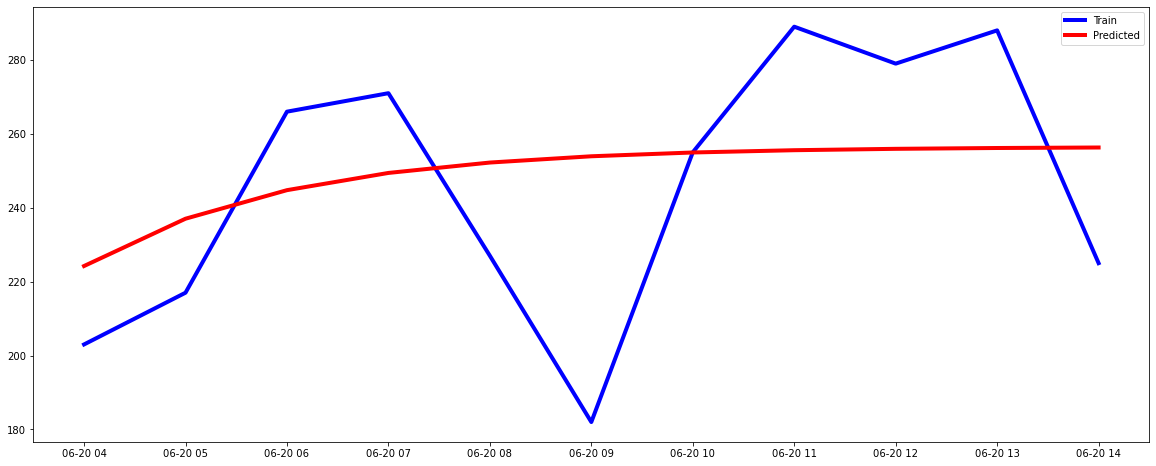

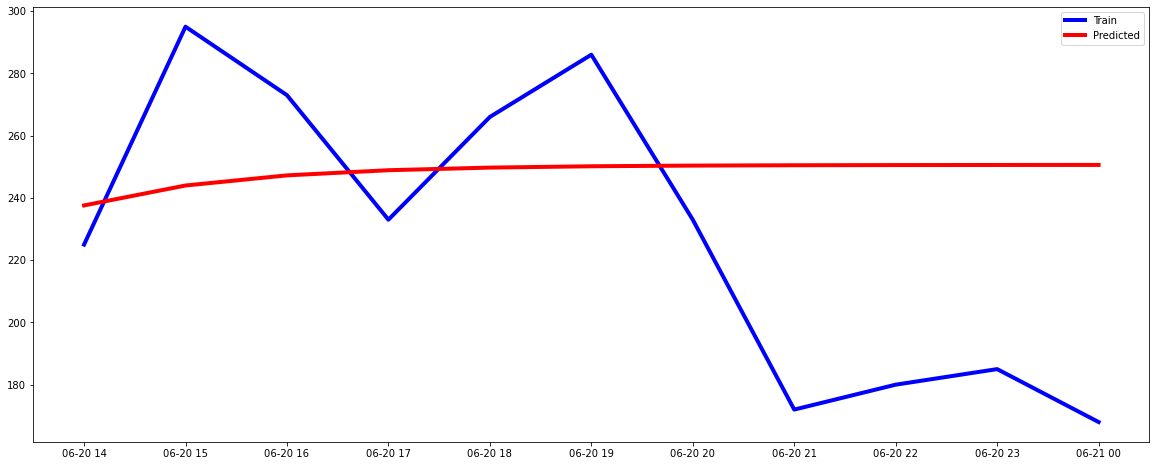

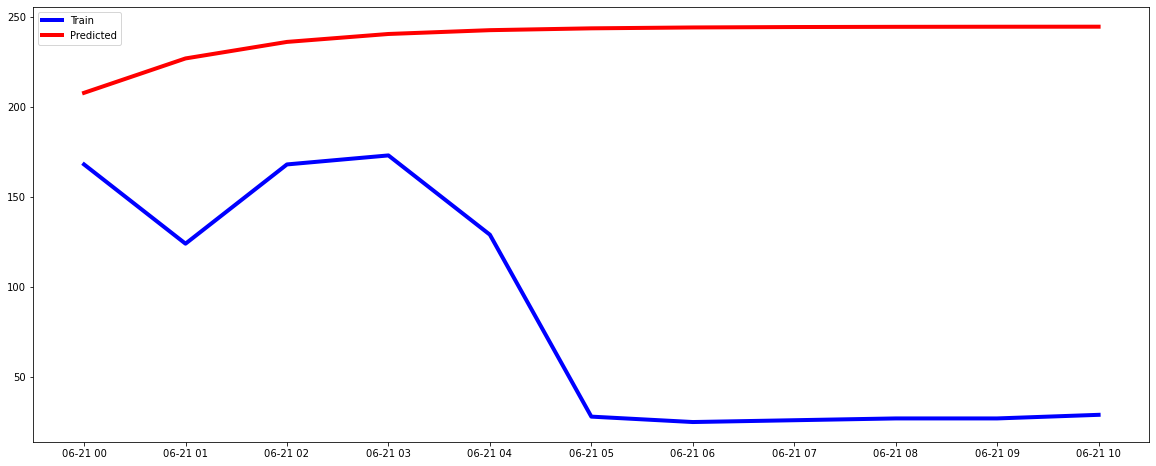

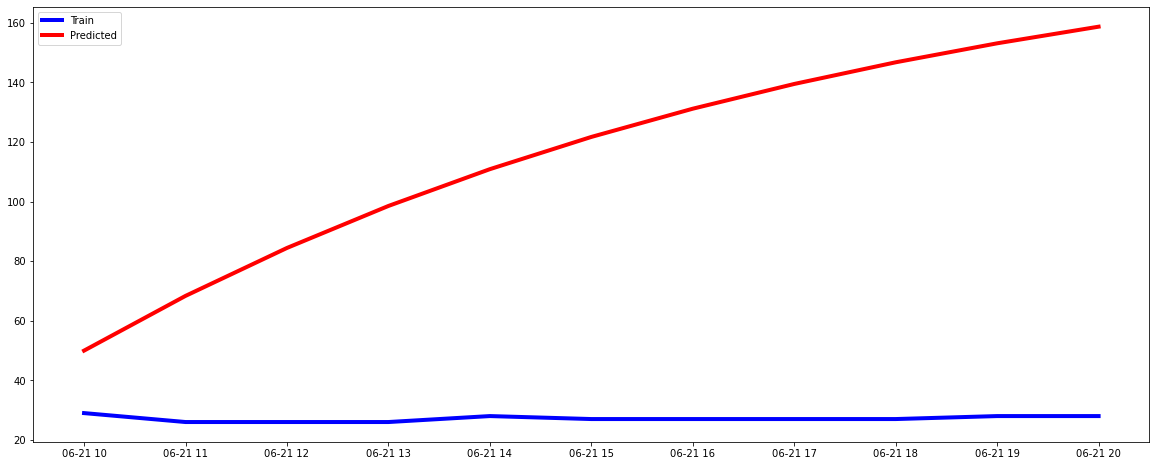

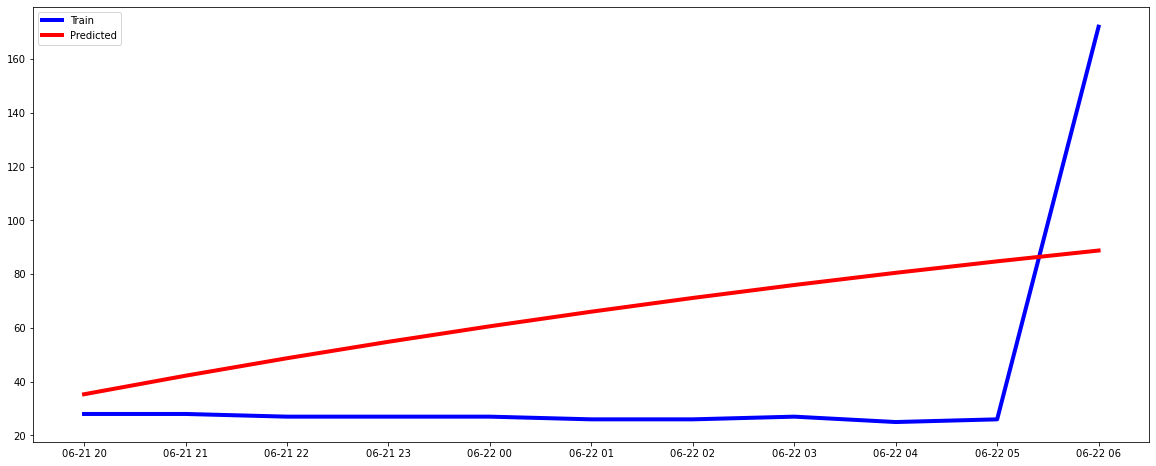

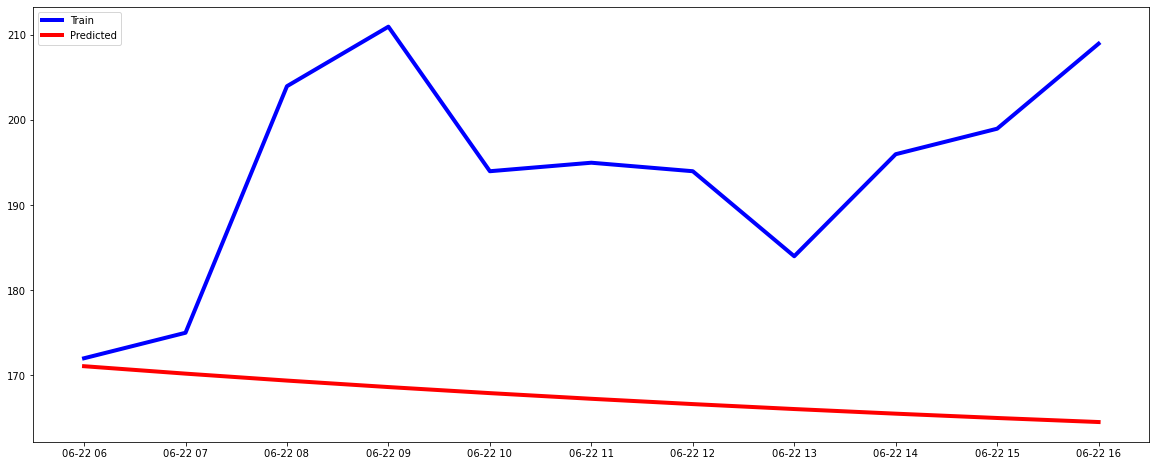

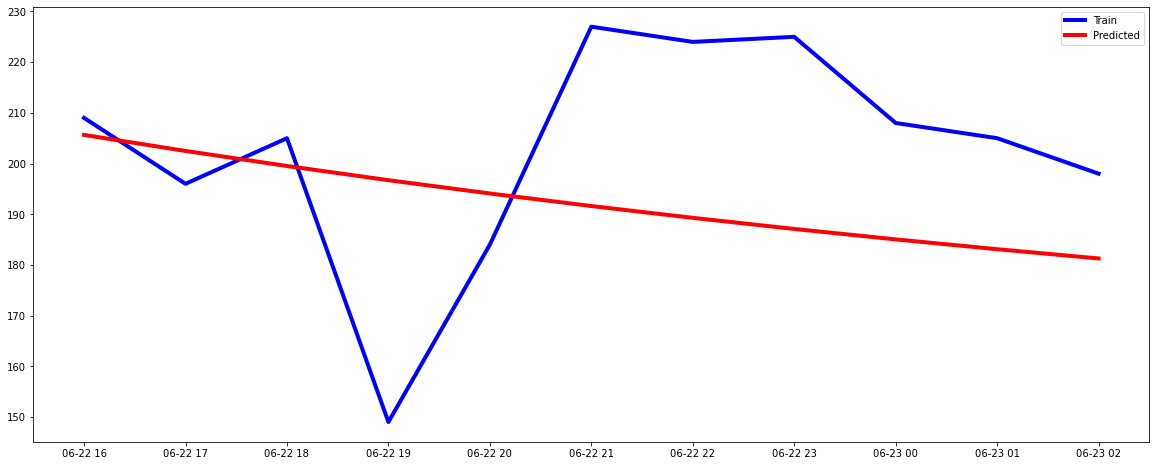

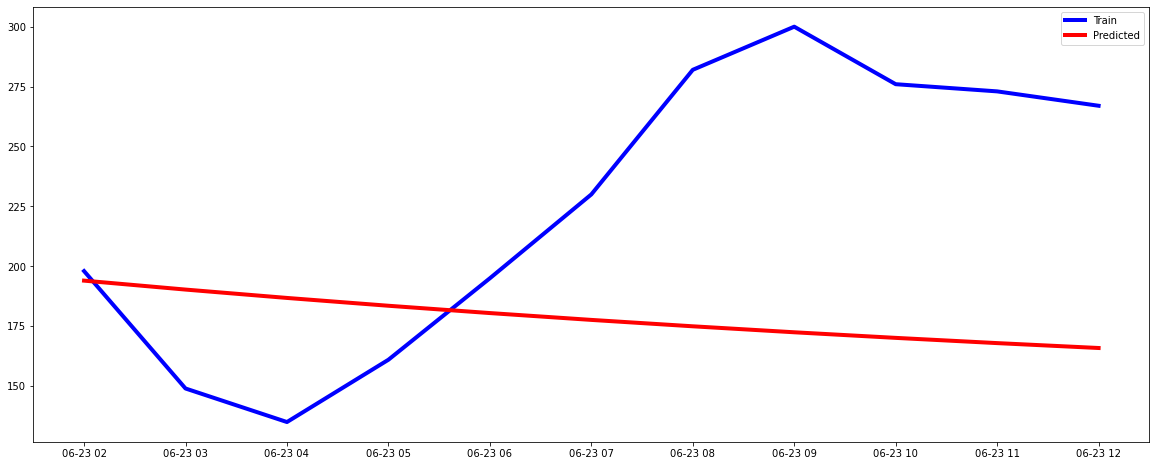

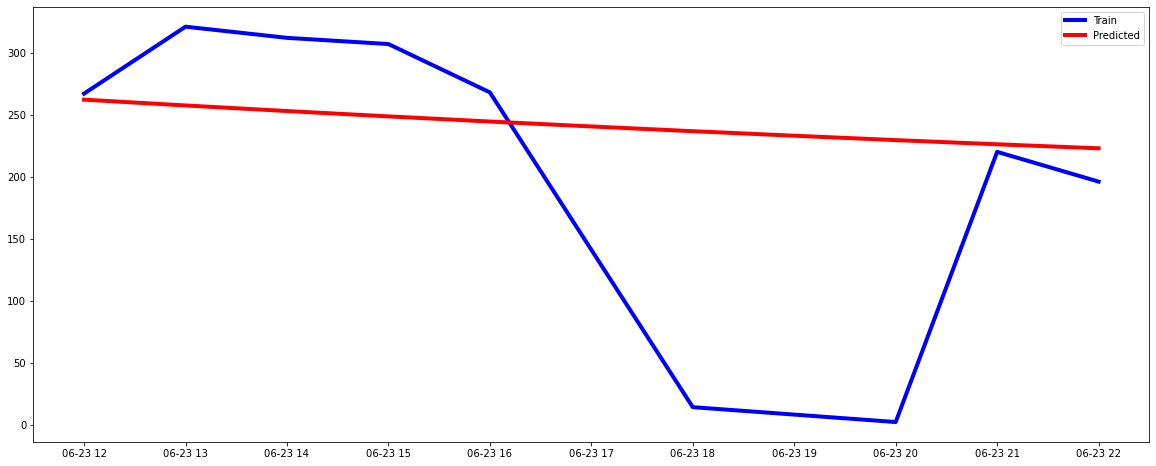

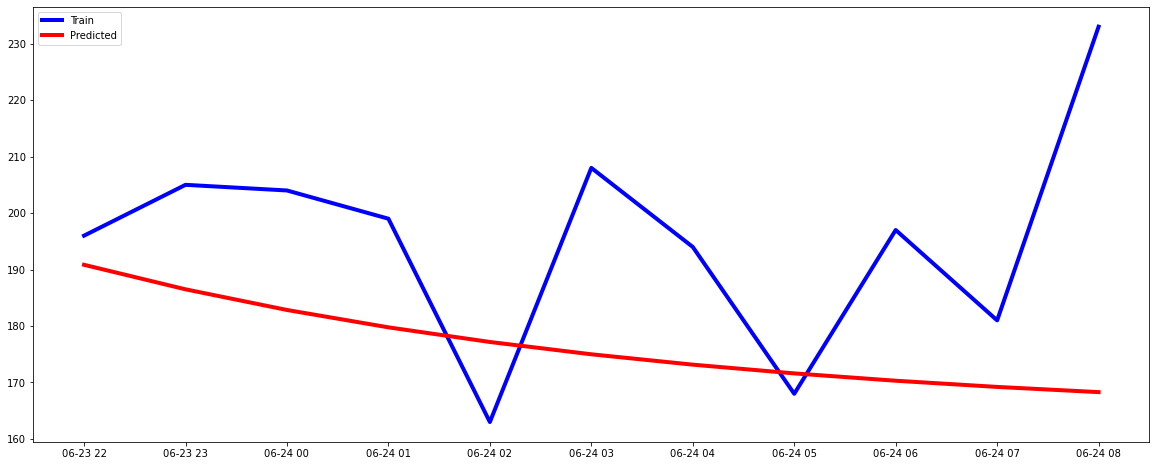

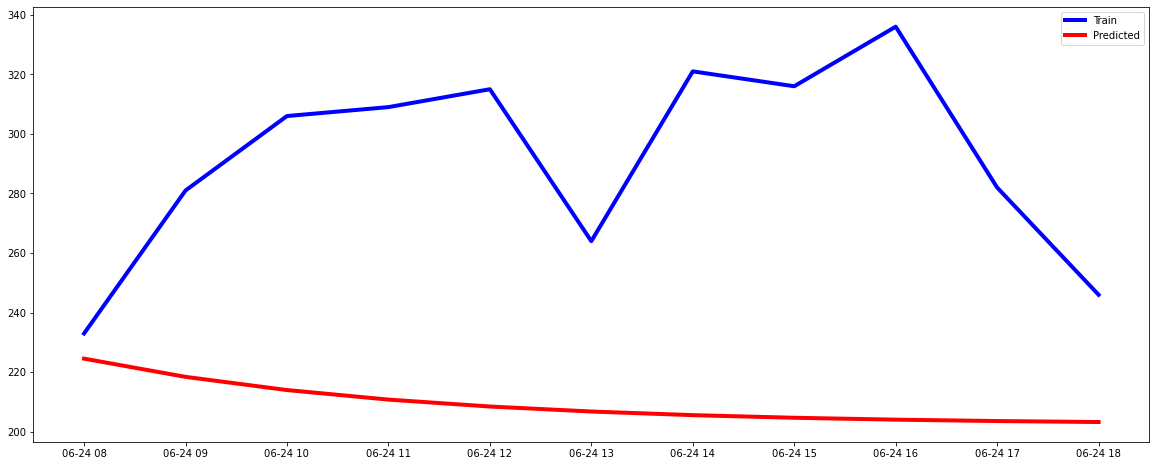

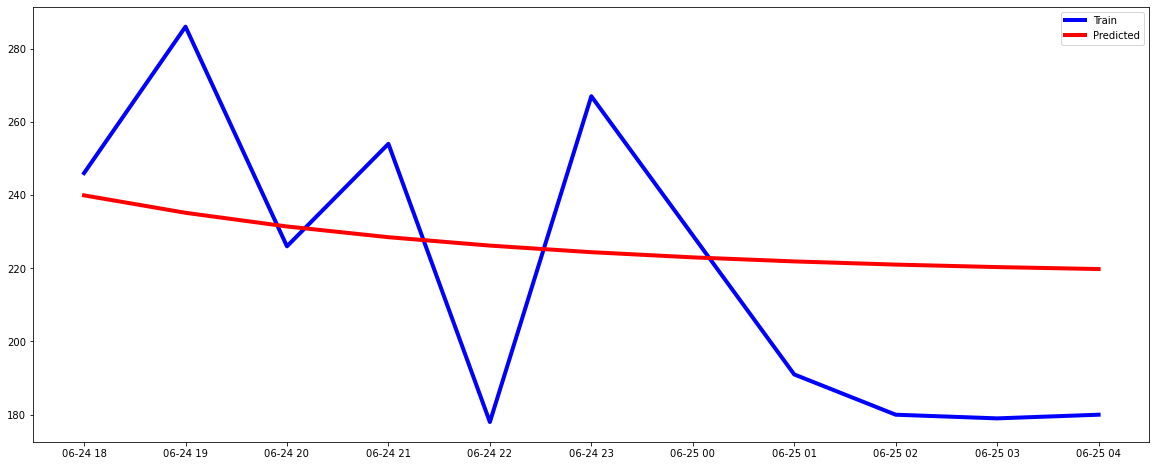

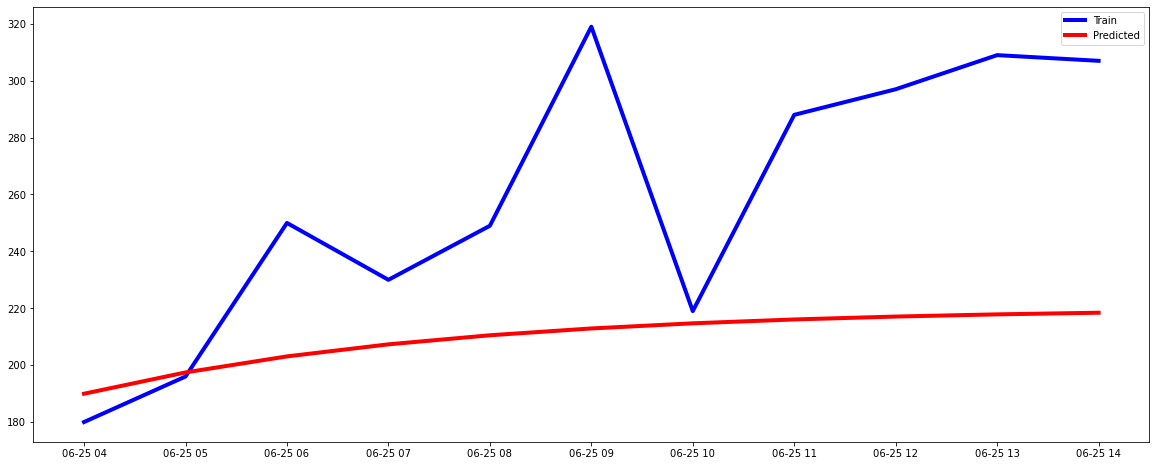

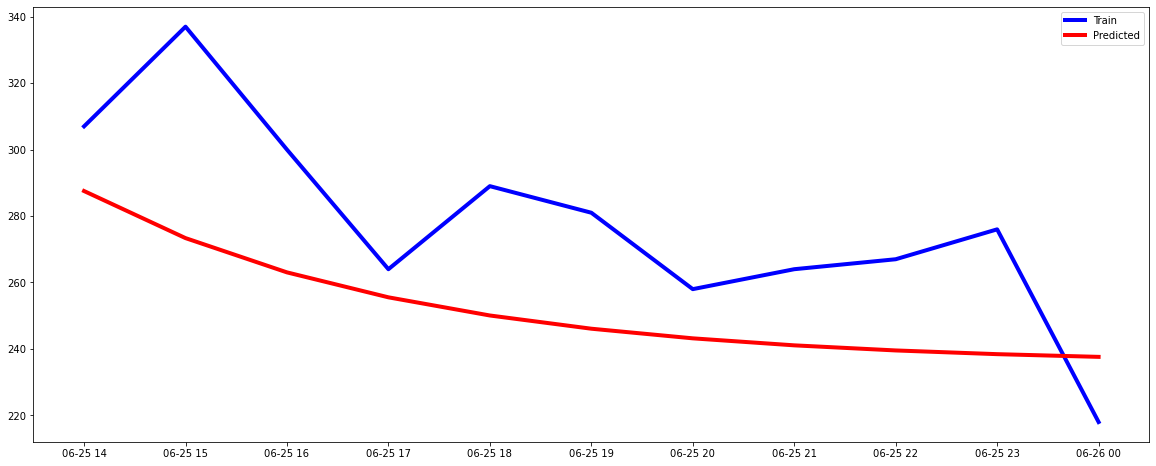

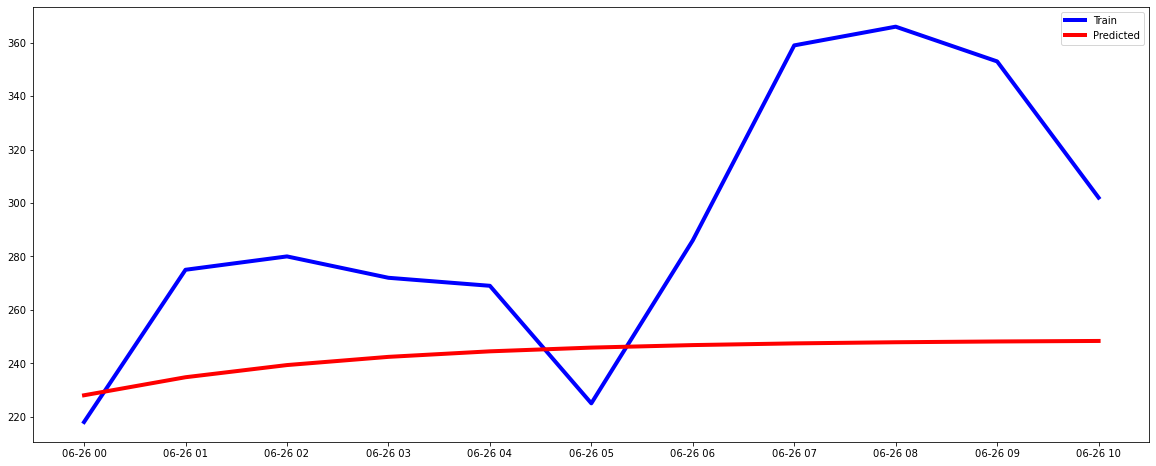

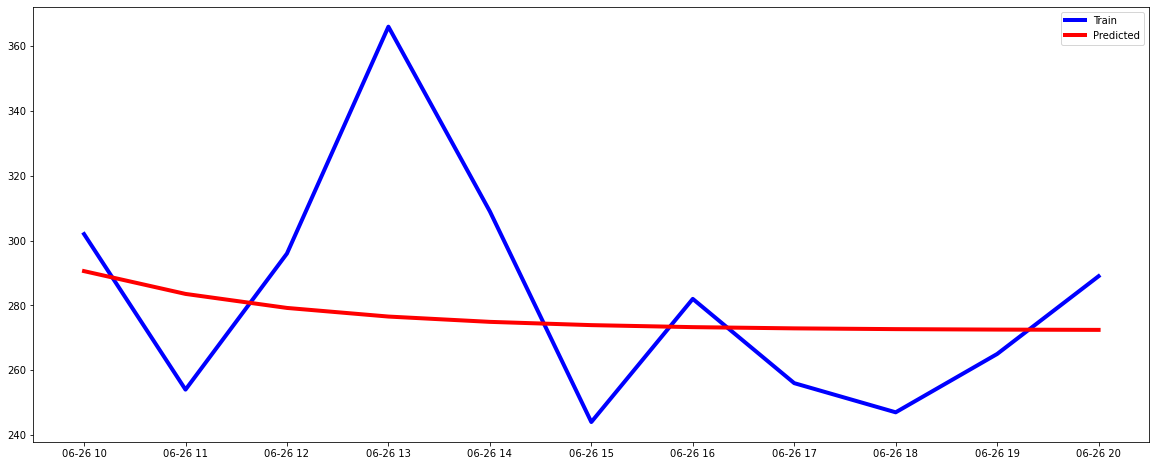

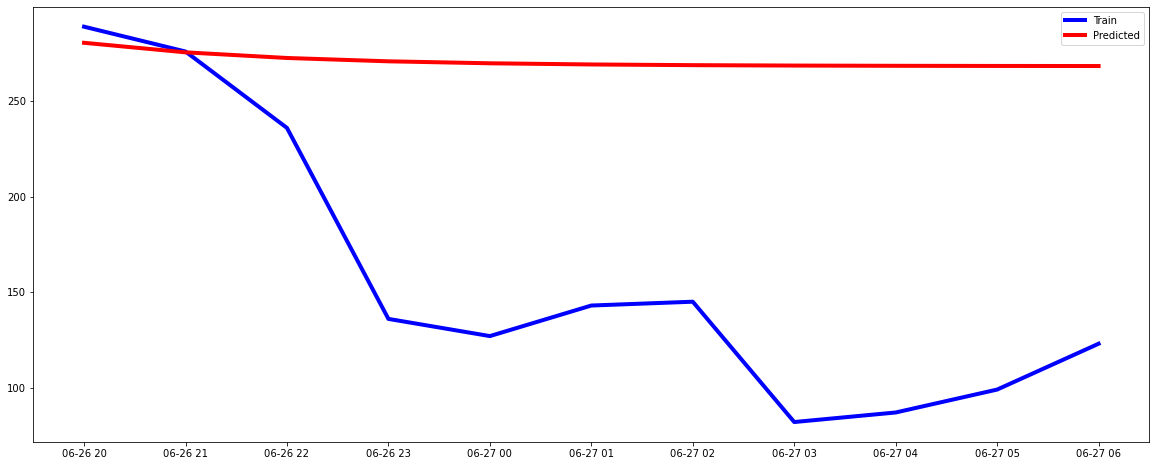

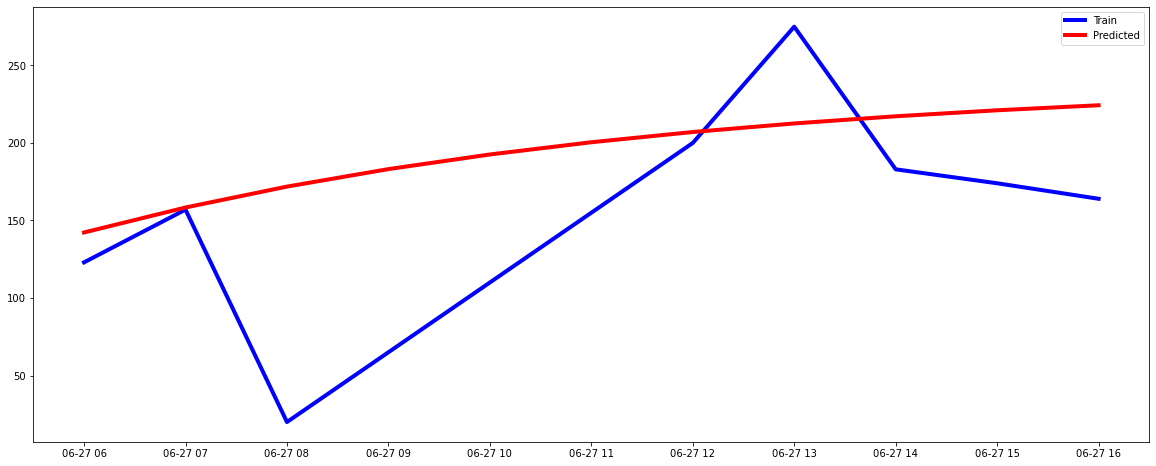

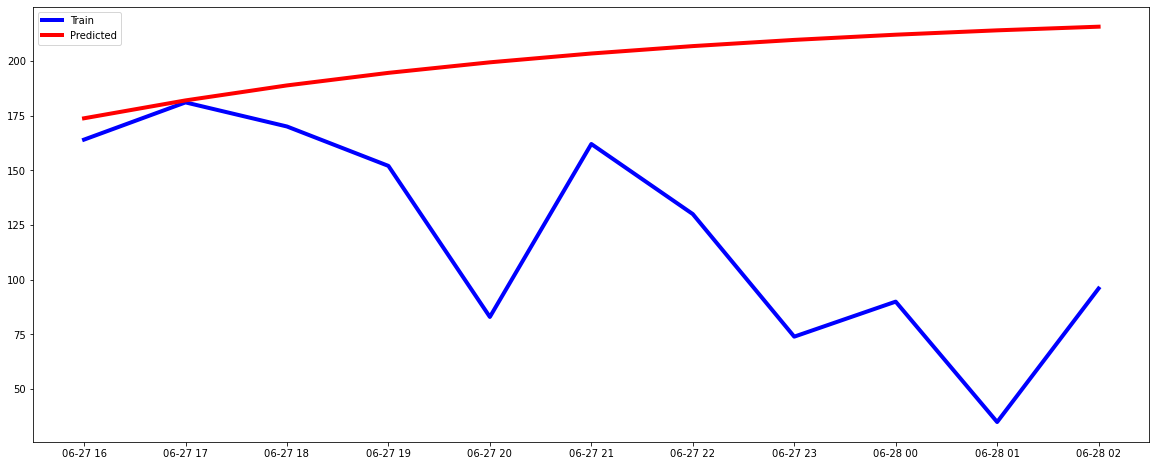

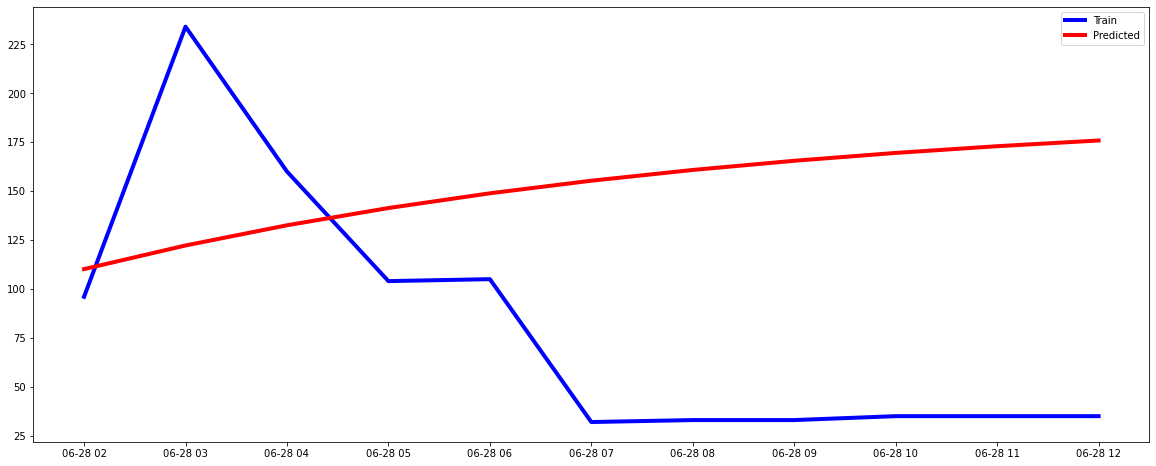

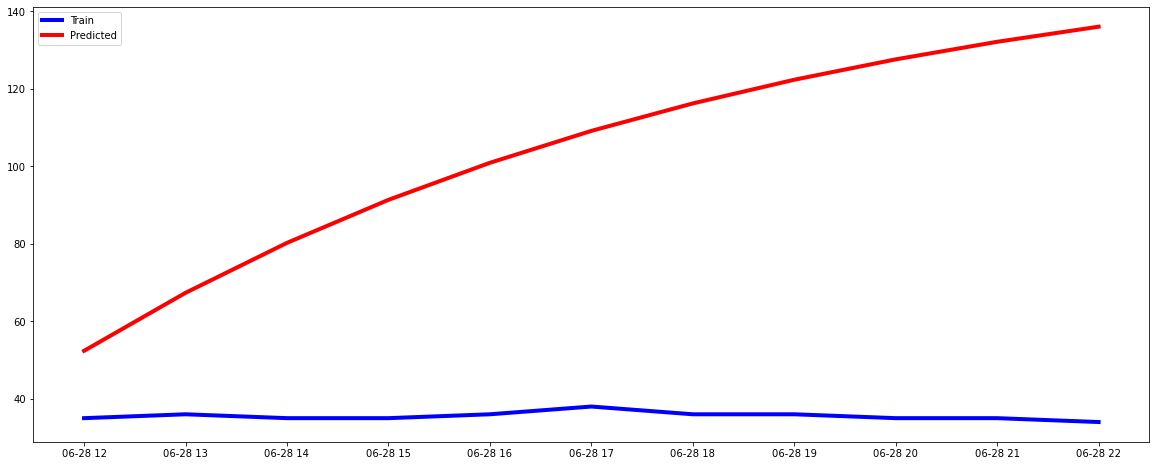

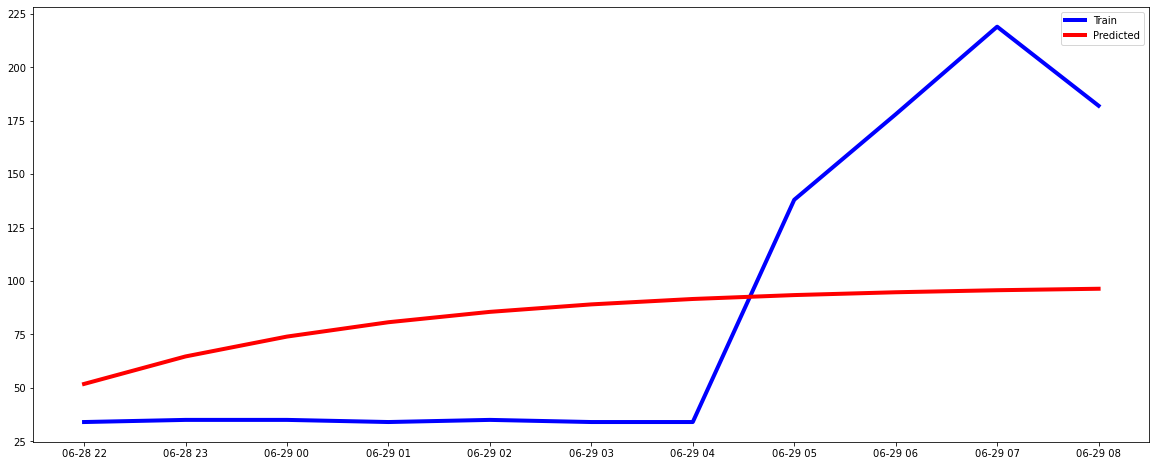

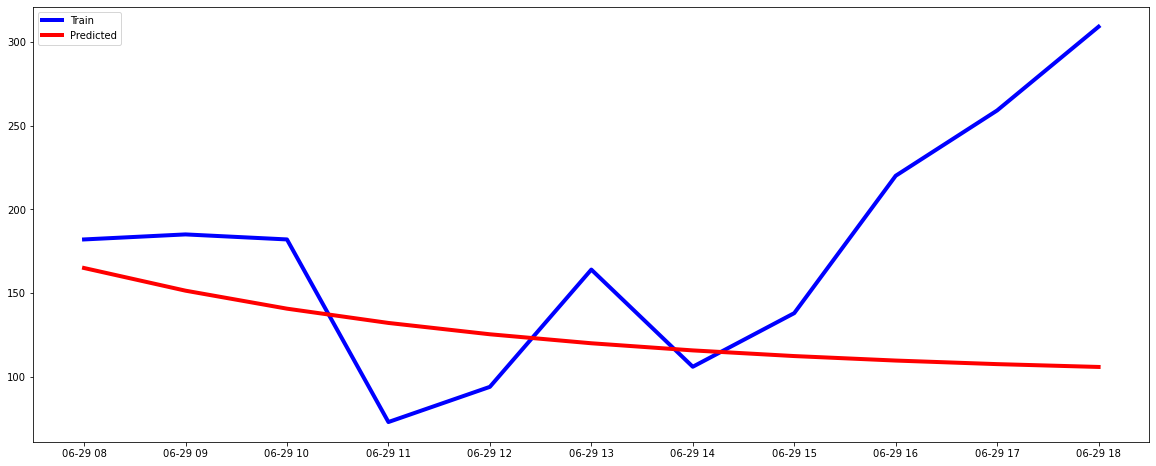

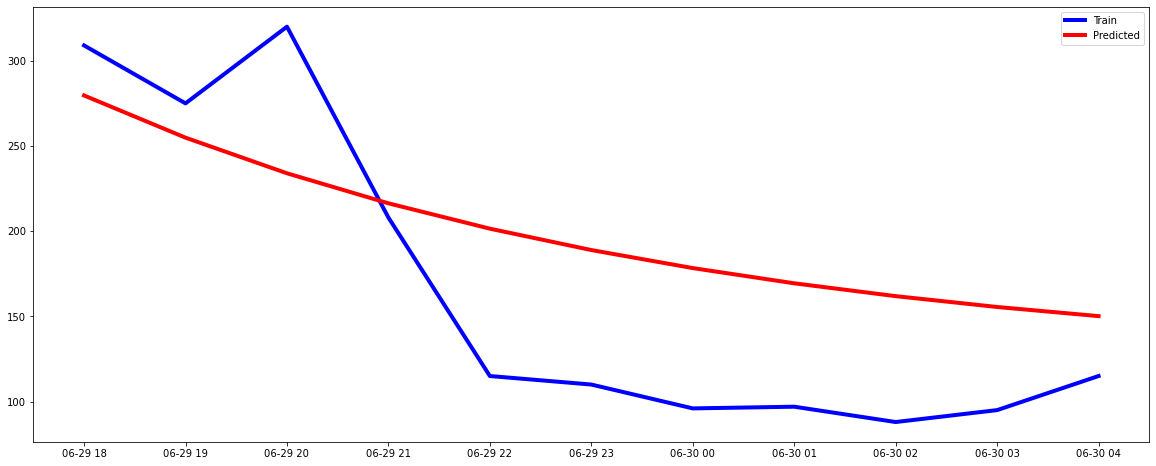

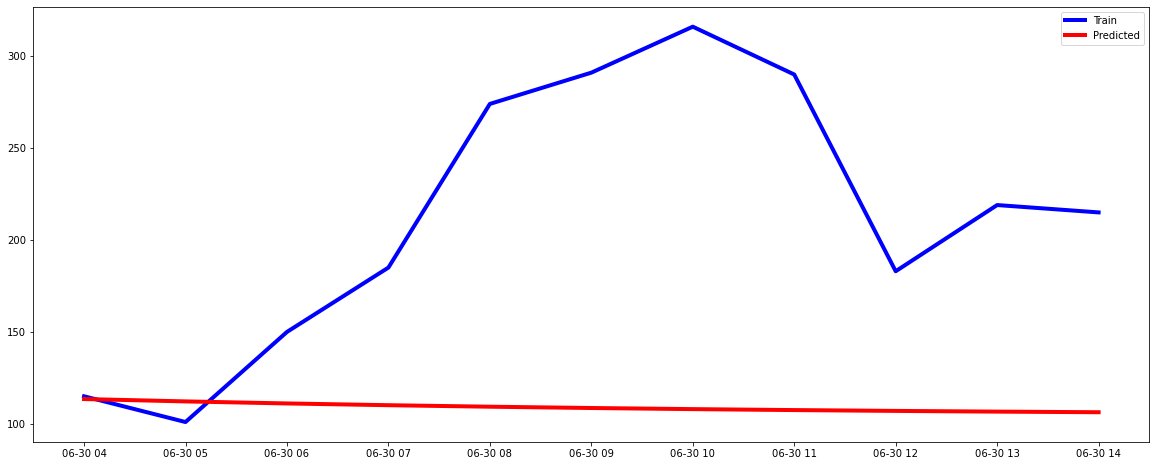

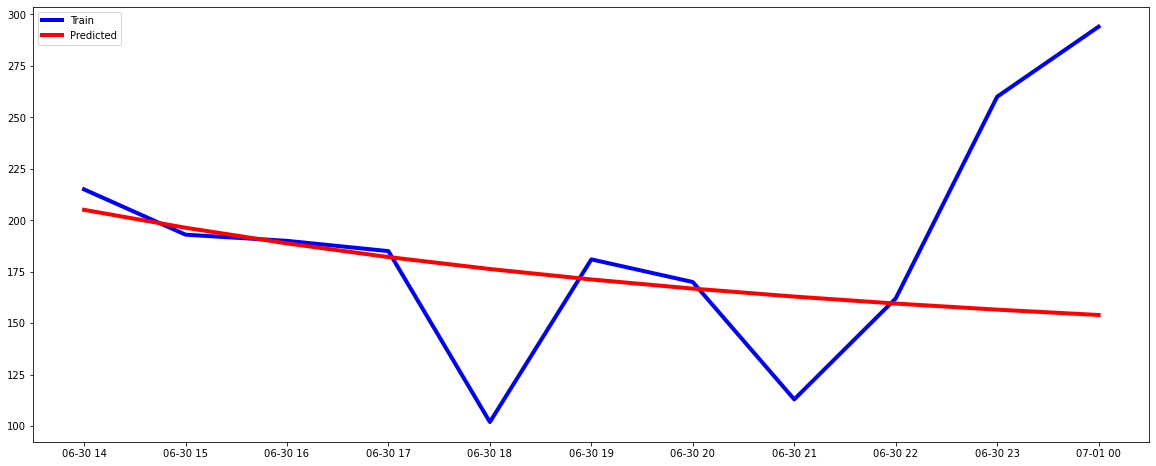

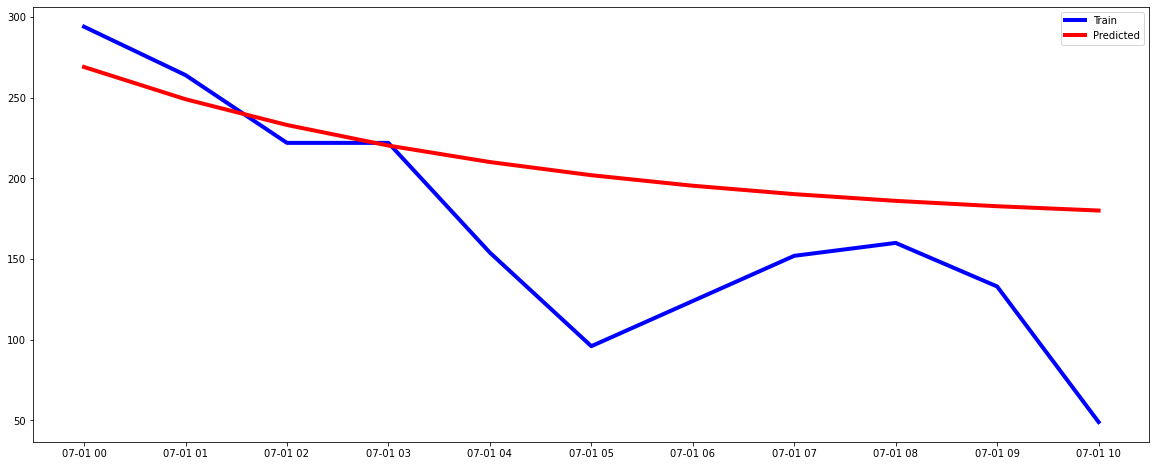

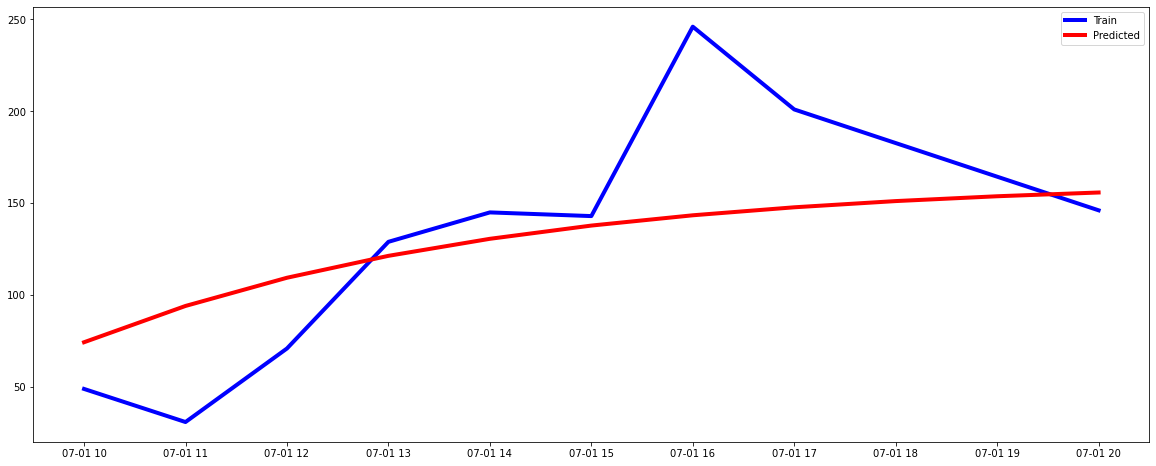

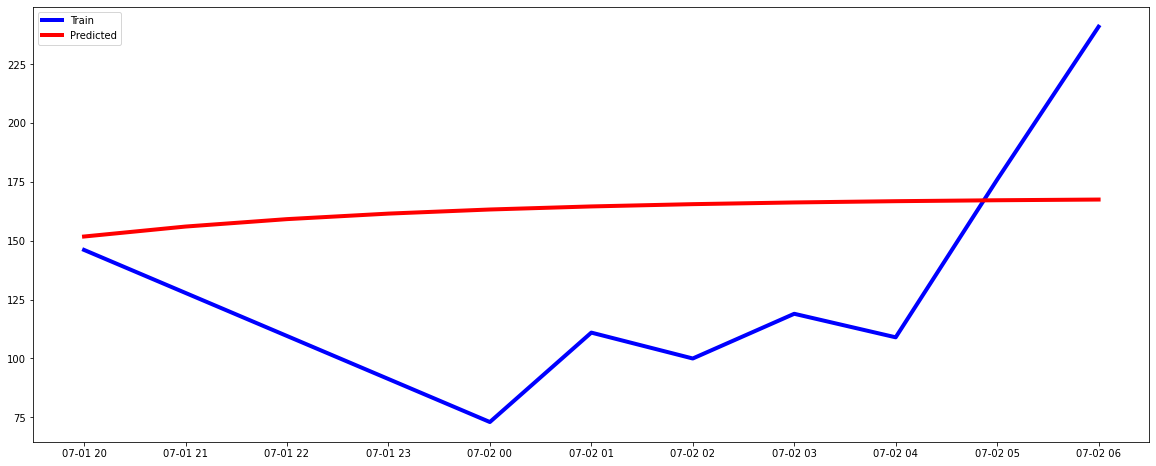

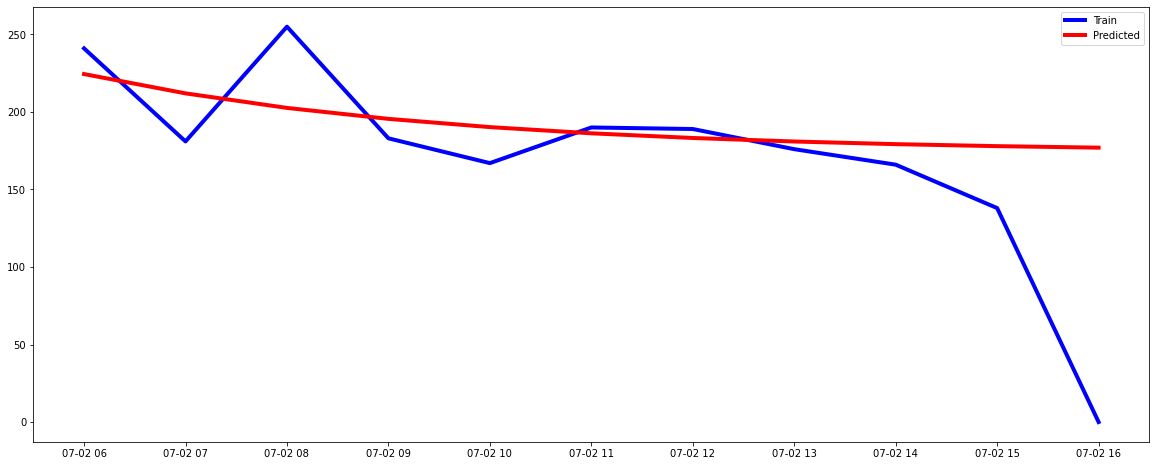

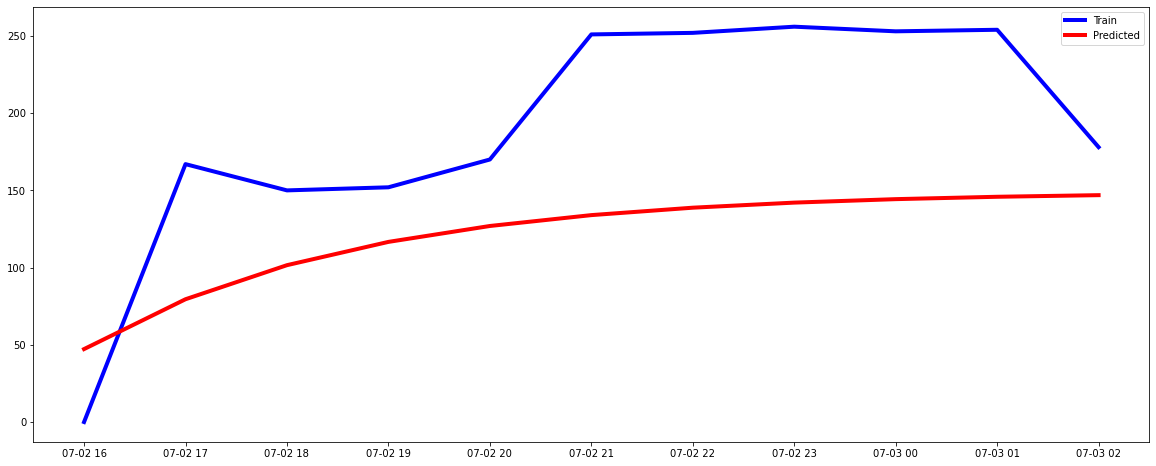

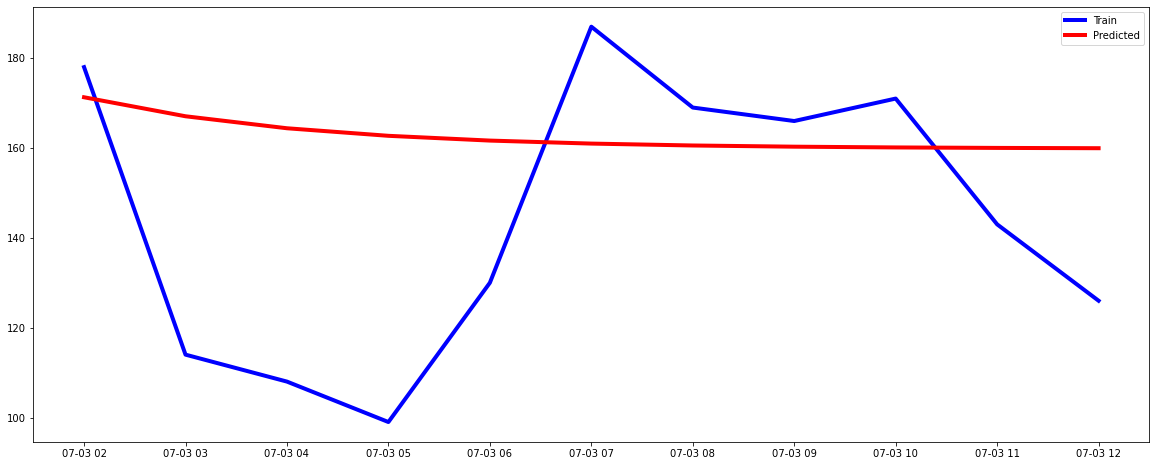

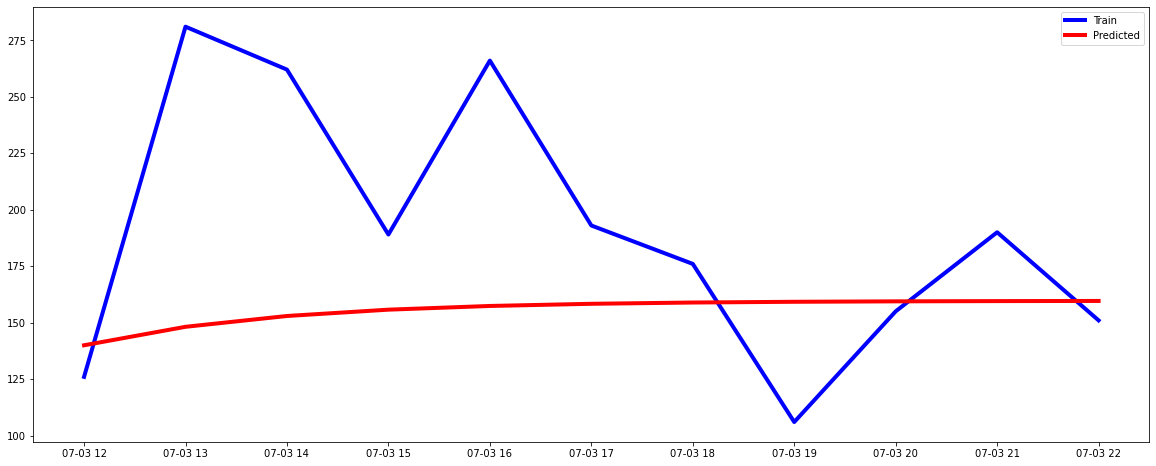

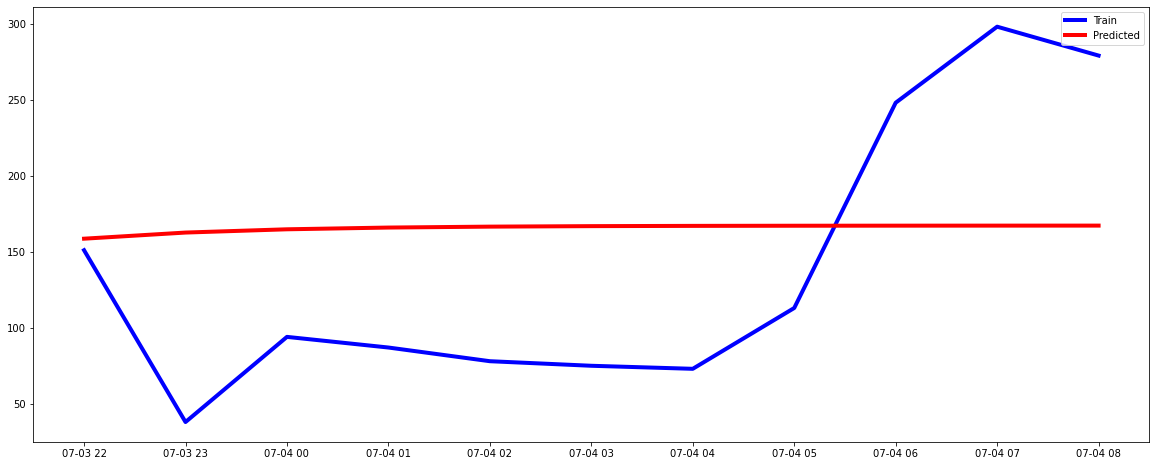

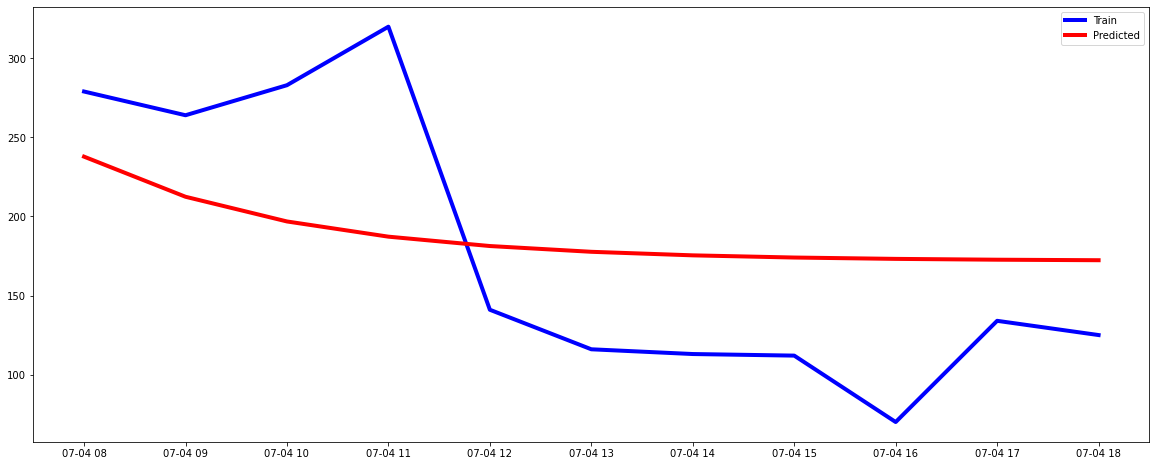

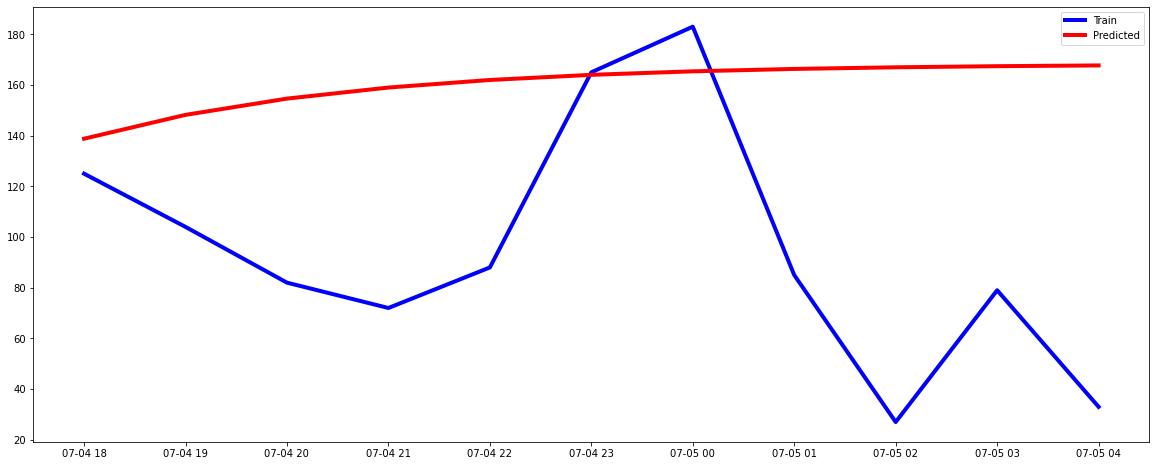

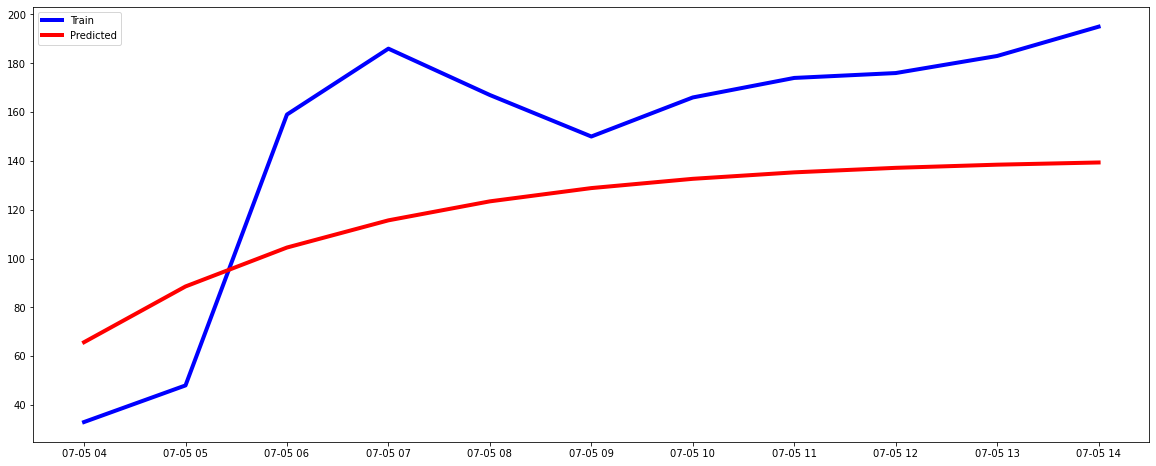

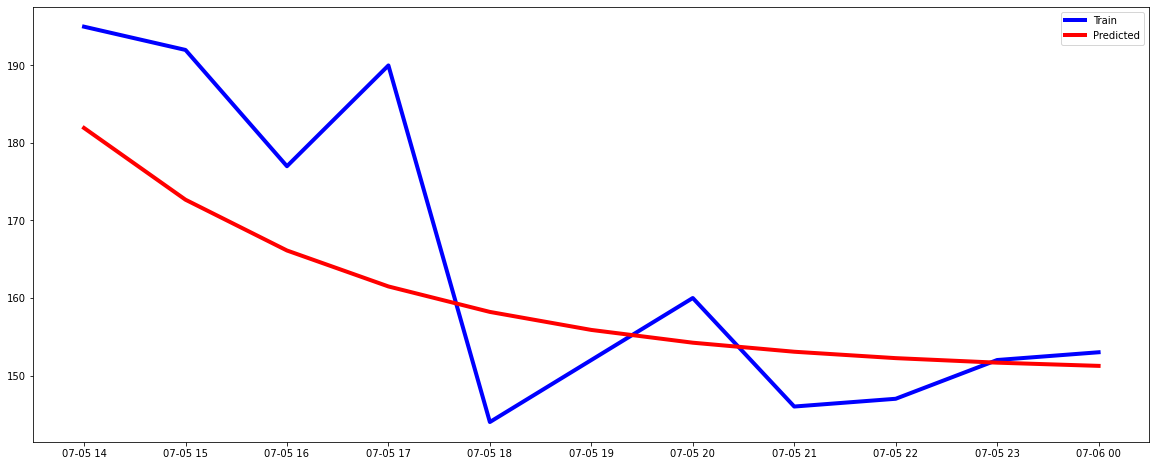

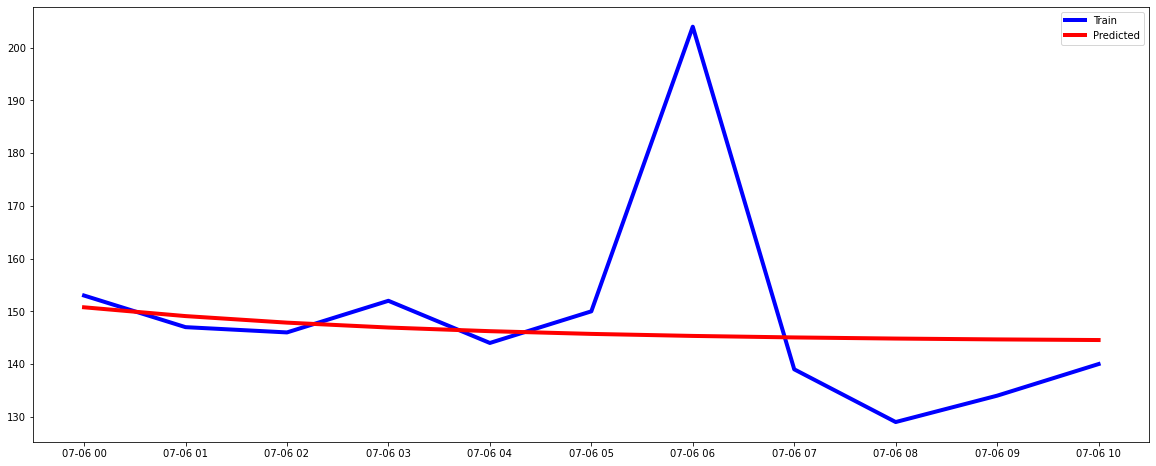

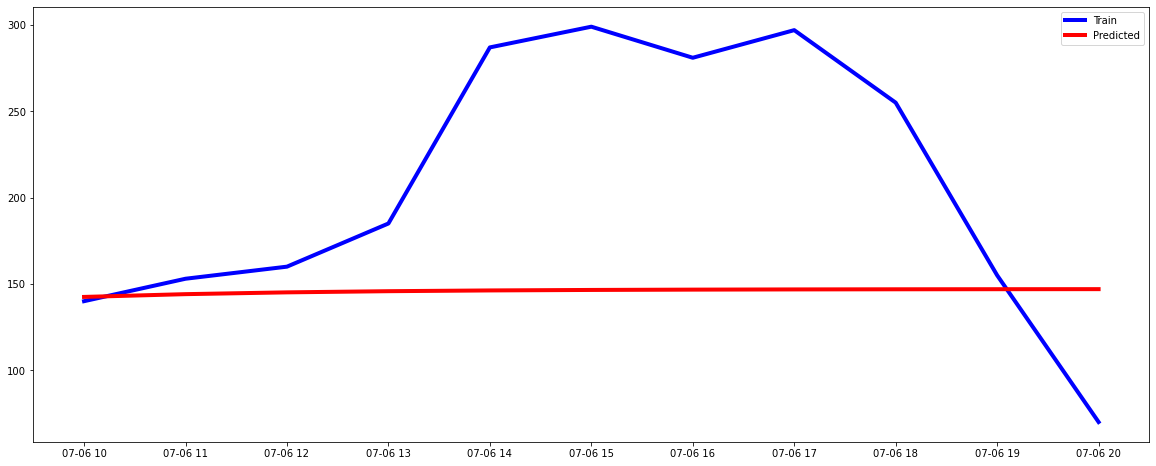

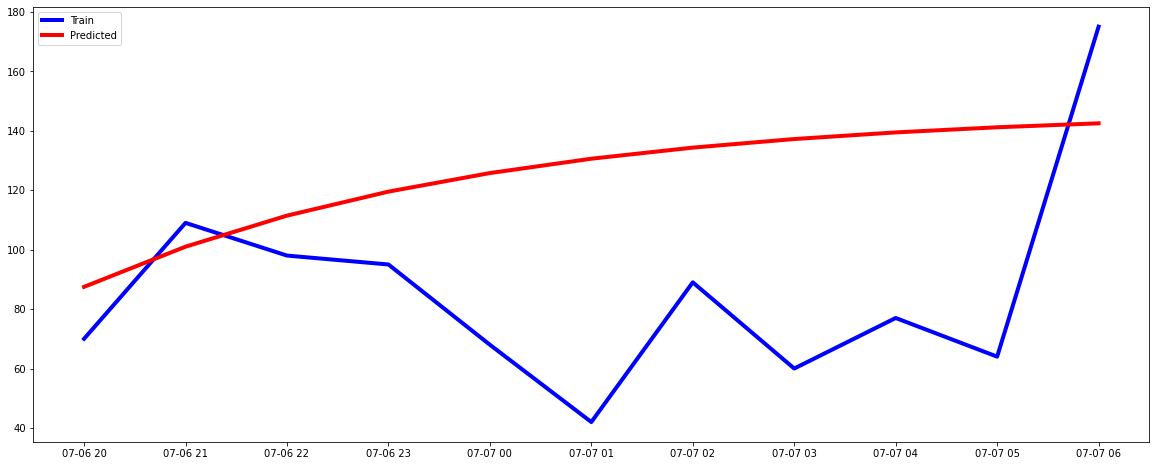

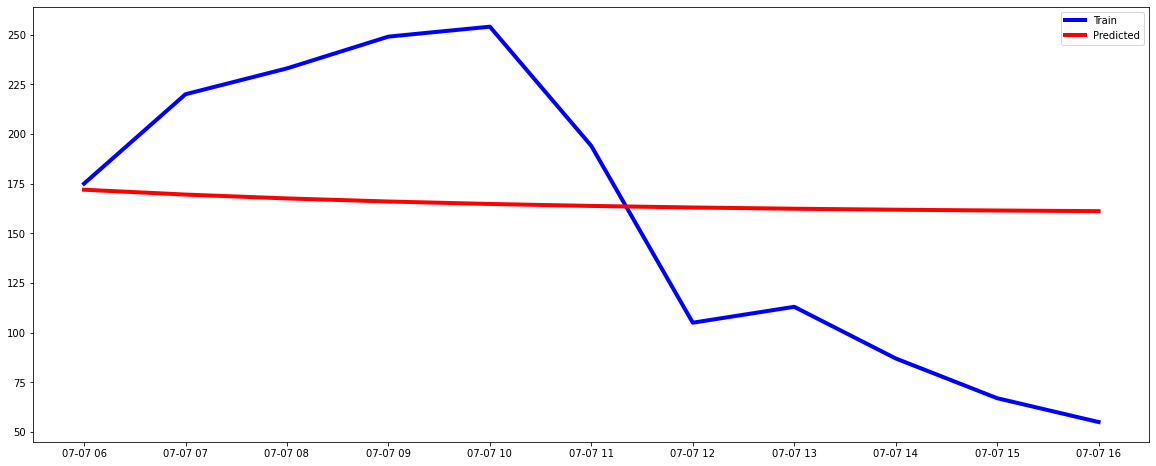

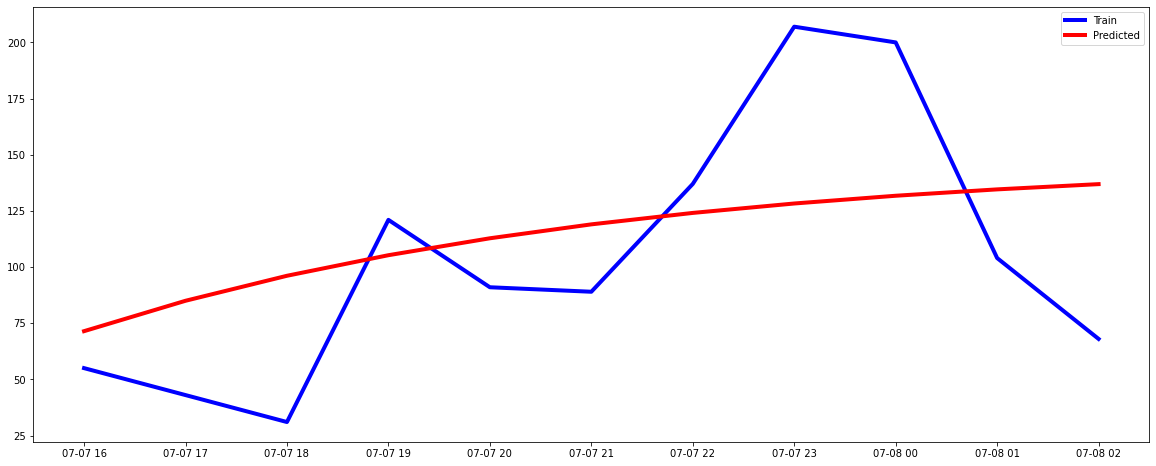

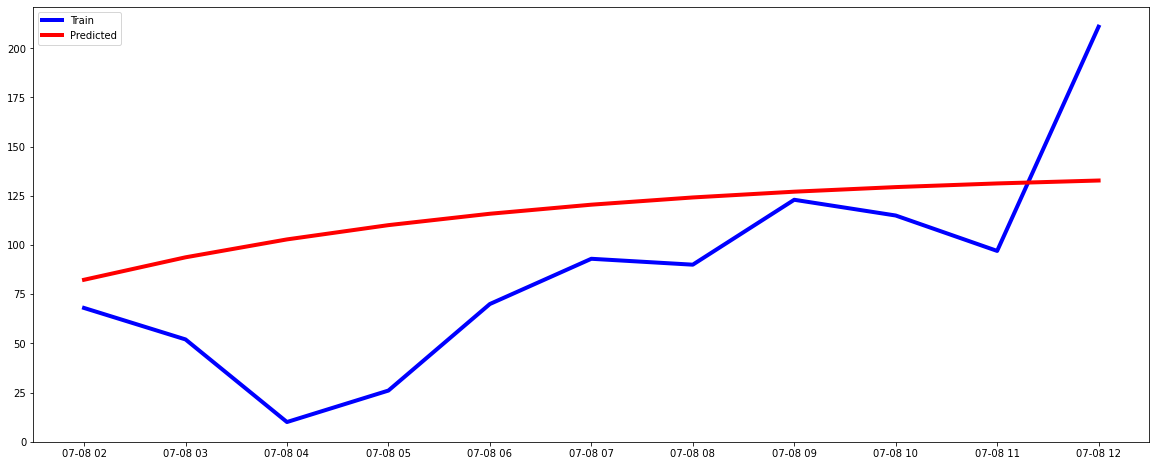

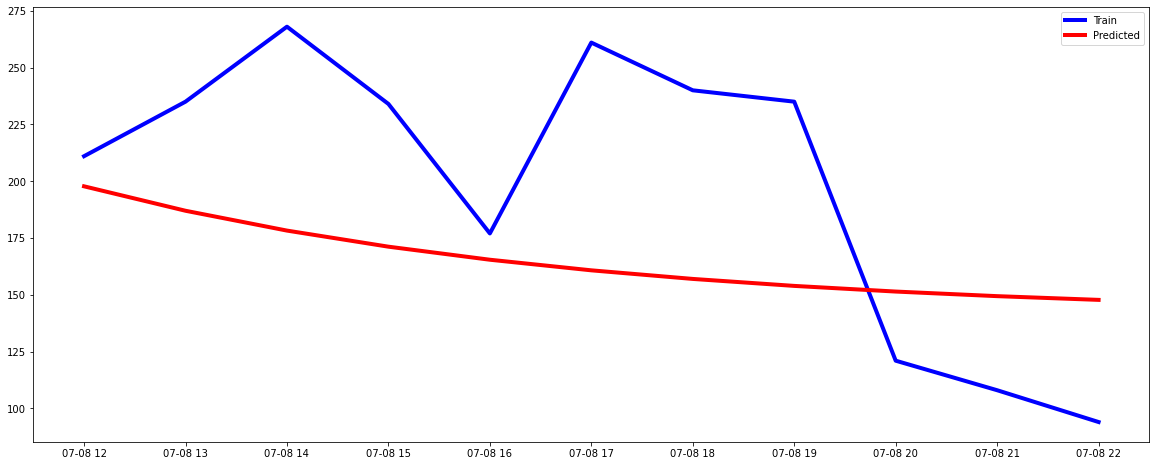

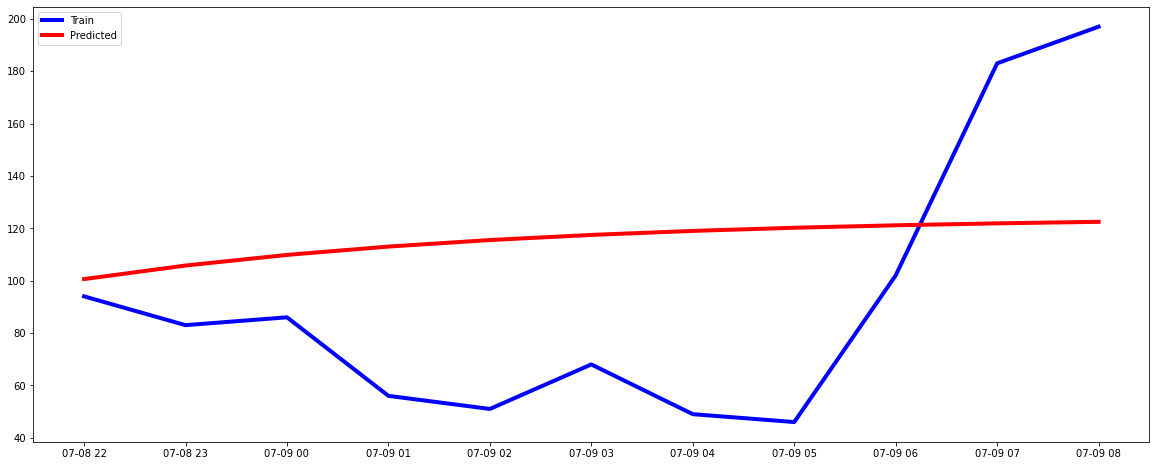

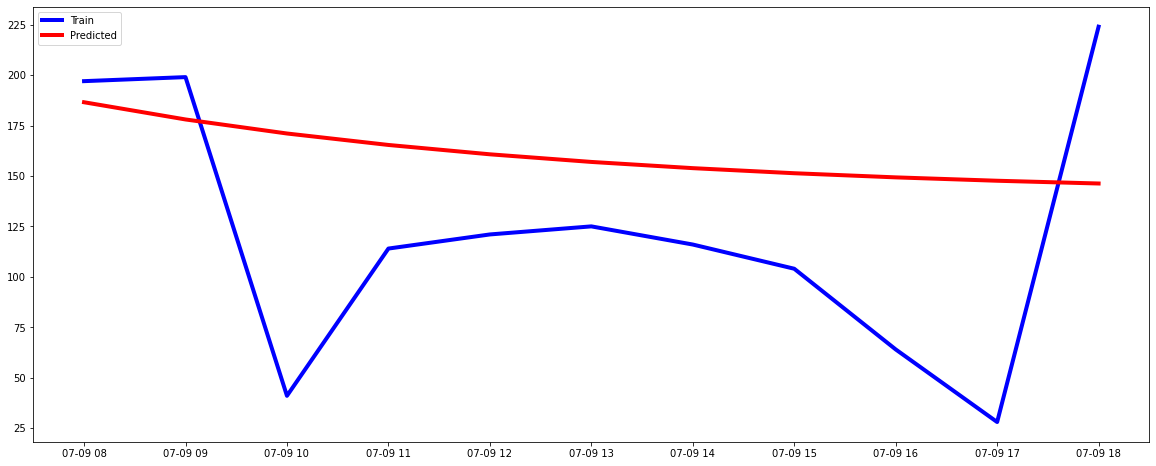

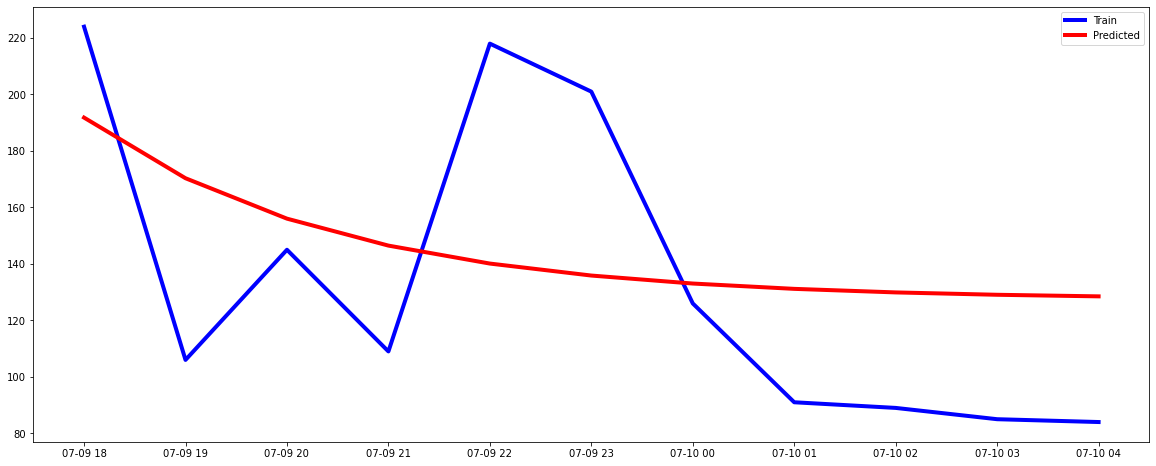

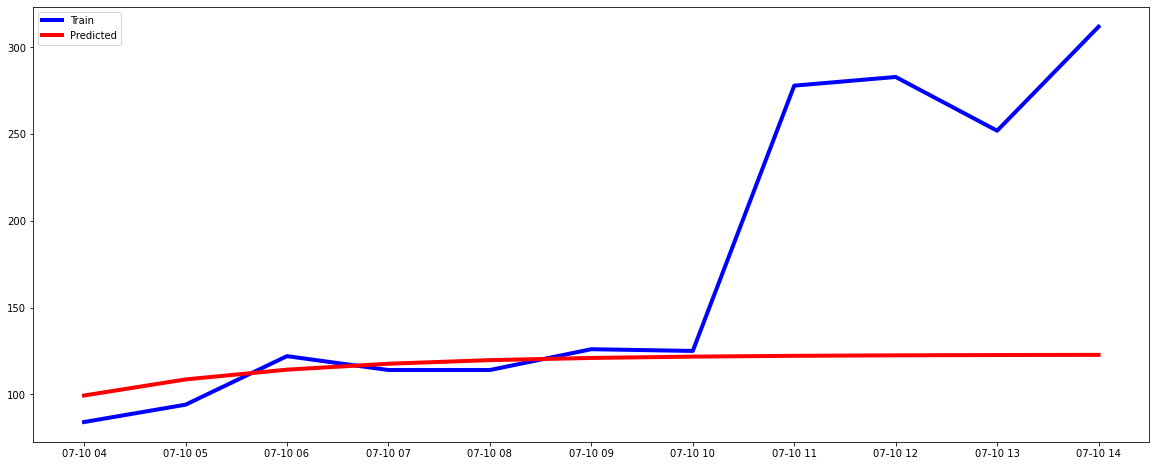

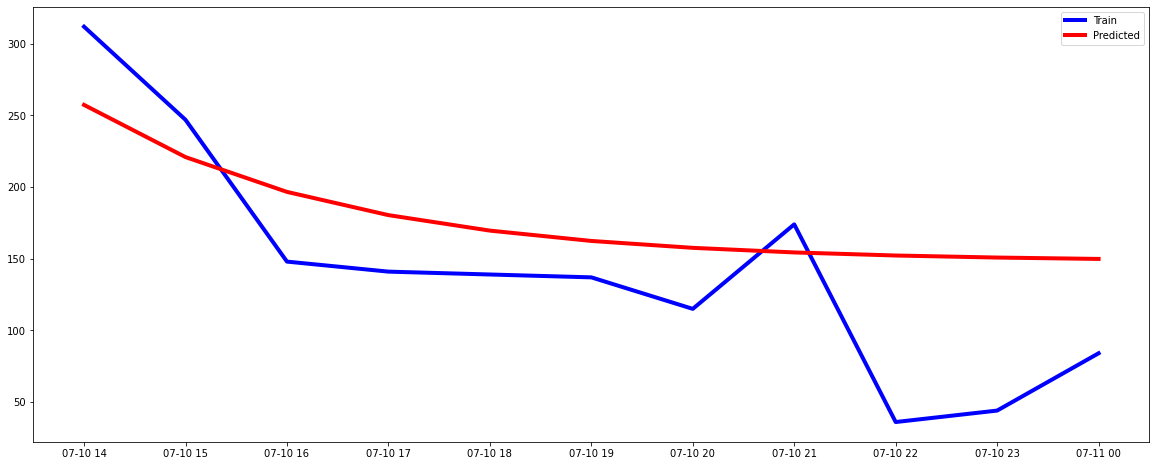

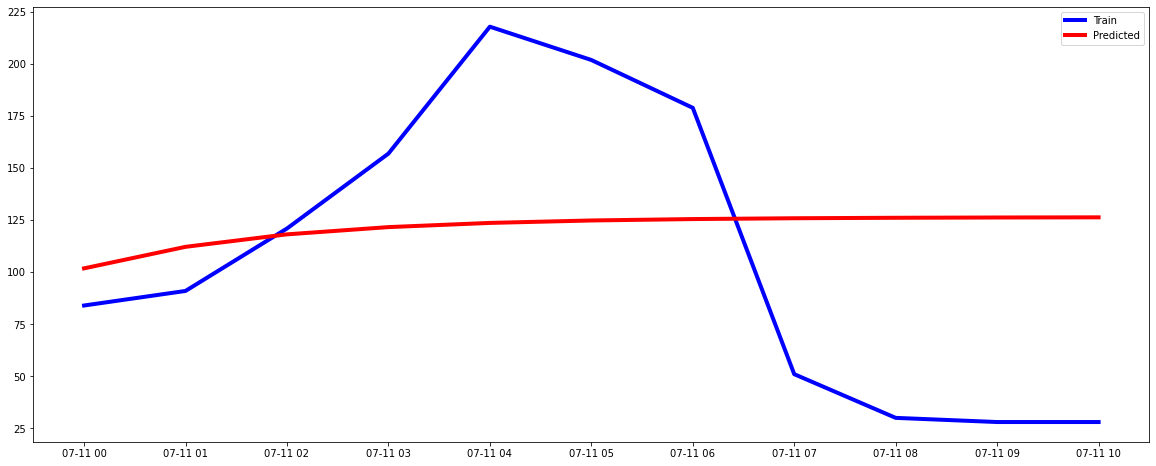

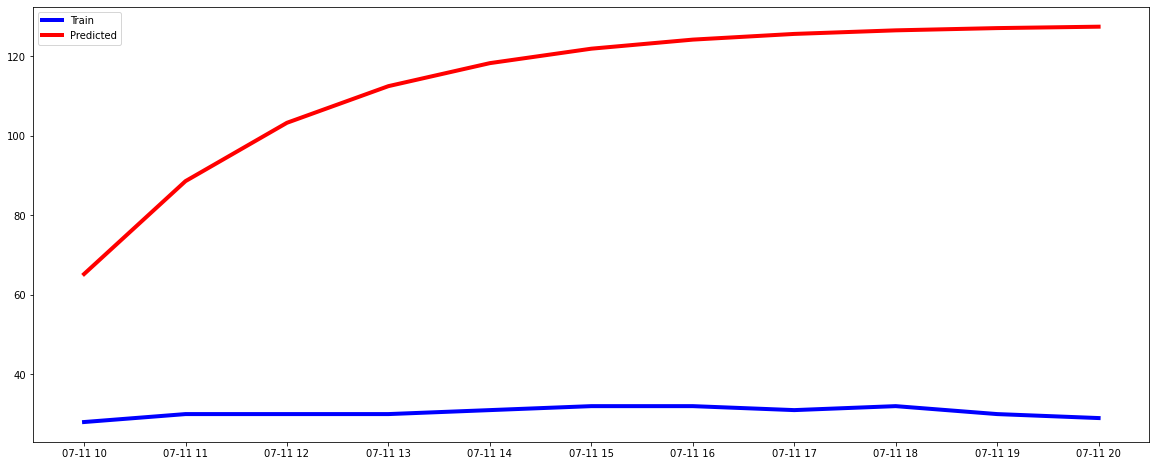

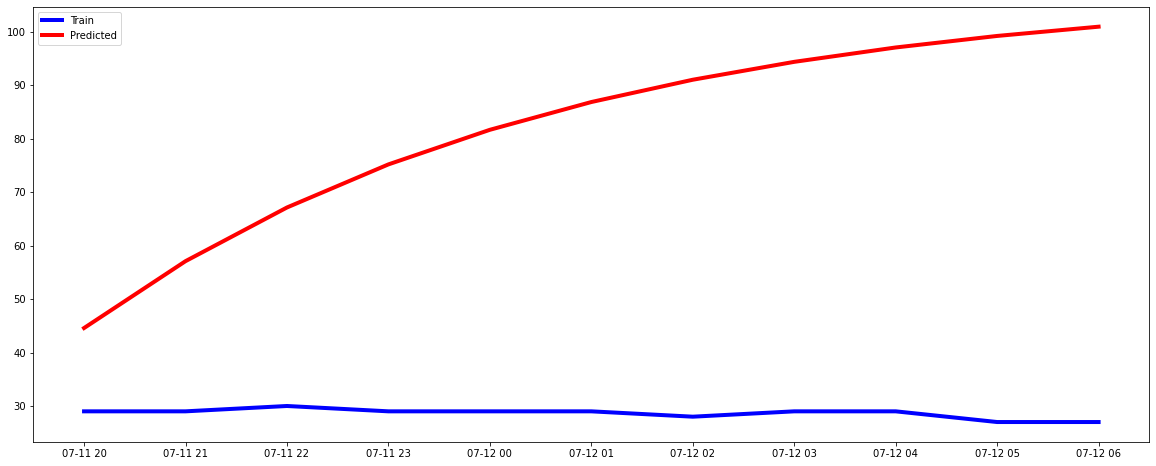

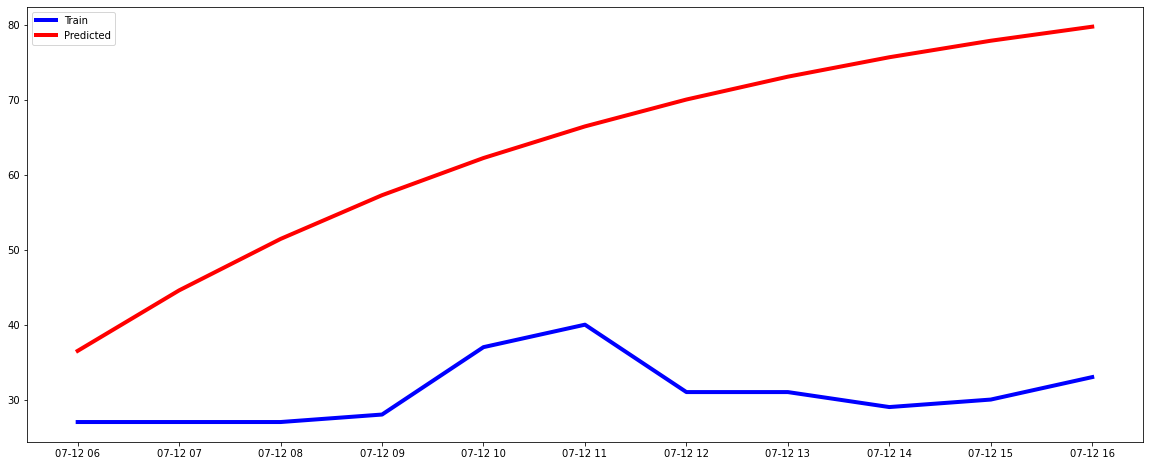

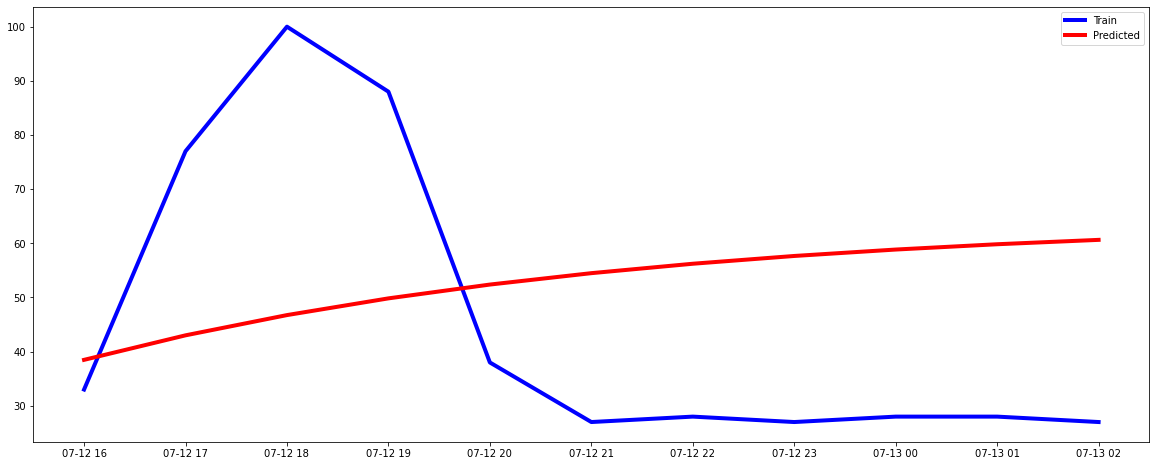

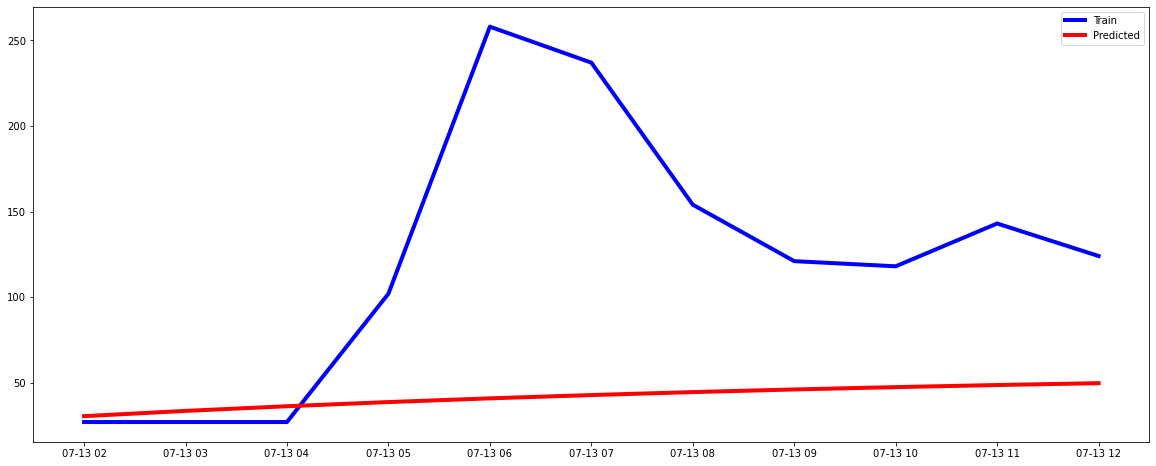

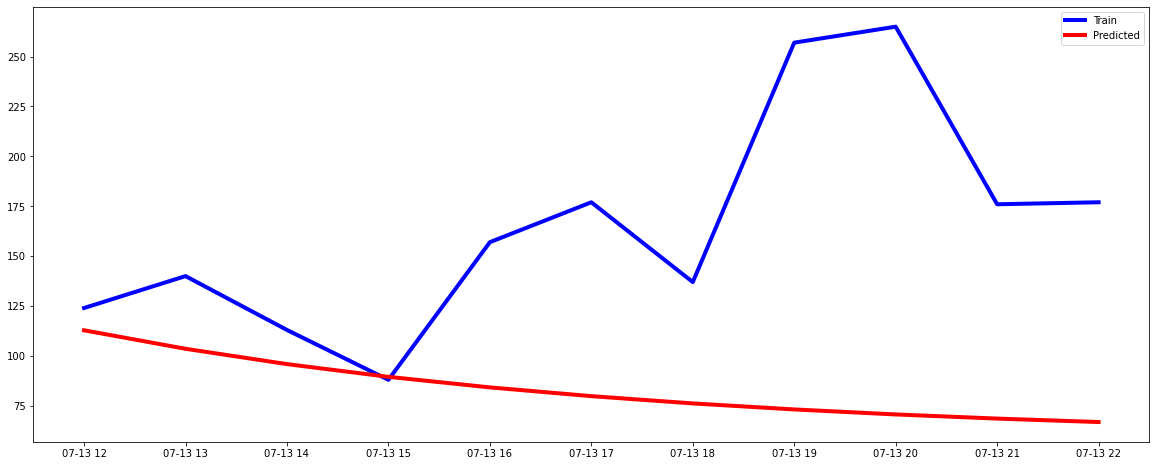

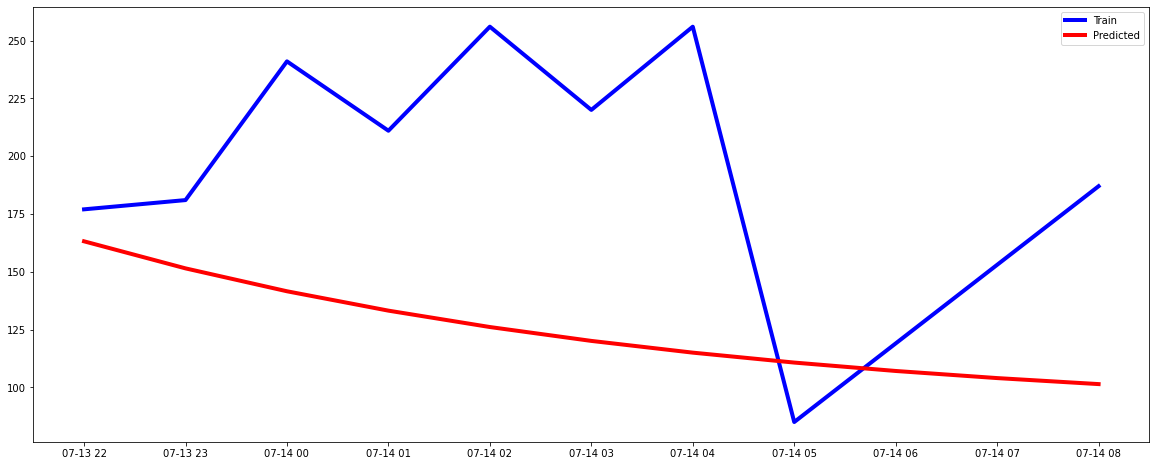

In [53]:
RMSE = []
m = 0
days = 24*2
dff=[]
for i in range((days+10),len(EM4),10):
    EM4_new = EM4.iloc[m:i]
    train = EM4_new[0 : -10]
    test = EM4_new[-11:]
    yhat = test.copy()
    m = i - days
    order = [1,0,0]
    a = len(yhat)
    model = ARIMA(train, order=order).fit(disp = False, transparams = False, trend = 'c', solver = 'nm')
    yhat['predictions'] = model.forecast(a)[0]
    yhat['predictions'] = yhat['predictions'].fillna(method = "bfill")
    yhat['rms'] = sqrt(mean_squared_error(test.EM4, yhat['predictions']))
    dff.append(order)
    plt.figure(figsize=(20,8))
    plt.plot(test['EM4'], label='Train', lw = 4, color = 'blue')
    plt.plot(yhat['predictions'], label='Predicted', lw = 4, color = 'red')
    plt.legend(loc='best')
    plt.show()
    r = yhat['rms'].mean()
    RMSE.append(r)
#     print(yhat['rms'].mean())

In [54]:
print(statistics.mean(RMSE))

65.45470567566309


In [55]:
pd.DataFrame(RMSE).describe()

,0
count,67.000000
mean,65.454706
std,29.284281
min,12.812450
25%,44.750936
50%,62.730903
75%,81.800612
max,169.825554


In [56]:
# order = [0,1,0]
# a = len(yhat)
# model = ARIMA(EM4, order=order).fit(disp = False, transparams = False, trend = 'c', solver = 'nm')

In [57]:
# model.summary()

In [59]:
order = [1,0,0]
a = 1
model = ARIMA(train, order=order).fit(disp = False, transparams = False, trend = 'c', solver = 'nm')
predictions = model.forecast(a)[0]
# predictions = predictions.fillna(method = "bfill")

In [61]:
predictions[0]

163.16721527673107